In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH_CSV = '/content/drive/MyDrive/internship'

In [3]:
files_lst = os.listdir(PATH_CSV)
for item in files_lst: print(item)

t1_20220101_20220726_rg_201589066.csv
t1_20220601_20220621_hits_rg_201589066.csv
t1_20220601_20220621_rg_201589066.csv
t2_20190101_20191231_rg_201711160.csv
t3_20220101_20230106 rg_184390113,199898941.csv
t4_20220601_20220621_rg_106176610.csv
t4_20220601_20220621_hits_rg_106176610.csv


##t1_20220101_20220726_rg_201589066.csv

In [4]:
# Загрузка данных из файла
t1_1 = pd.read_csv(os.path.join(PATH_CSV, files_lst[0]))
t1_1

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,0,1,chrome,us,en,1654489350380812167,1,2022-06-06,1,...,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,0,3107078458710949968,[3107078458710949968]
1,1,1,1,yandexsearch,ru,ru,1654774521346384154,1,2022-06-09,2,...,360,startURL_2,june22,spec_all,banner,novostroy-m,NaN,0,3181830630067929292,[3181830630067929292]
2,2,2,1,safari_mobile,NaN,ru,1656147792622821132,1,2022-06-25,2,...,375,startURL_1,june22,spec_all,banner,pronovostroy,NaN,0,3541825601891205395,[3541825601891205395]
3,3,3,0,chromemobile,ru,ru,164793238281186116,1,2022-03-22,2,...,360,startURL_1,konkurenty-vc_net_mmo|61228084,id|31333861543_|cid|61228084|gid|4546929028|ai...,cpc,yandex,31333861543_,63,1387990388022968378,"[1387990388022968378,1388007054027522266,13879..."
4,4,4,1,safari_mobile,NaN,ru,1654789614786669323,1,2022-06-09,2,...,390,startURL_1,prigranichye_net_mir|74741535,id|39038979686_|cid|74741535|gid|4924248374|ai...,cpc,yandex,39038979686_,0,3185787202690875607,[3185787202690875607]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361914,361914,70461,0,samsung_internet,ru,ru,16416832381006613791,1,2022-01-09,2,...,412,startURL_109,NaN,NaN,NaN,NaN,NaN,222,18201666937923305665,"[18201666937923305665,18201668868290379926,182..."
361915,361915,70462,1,chromemobile,ru,ru,1649593897222170334,1,2022-04-23,2,...,360,startURL_1,brend_search_rf|33943744,id|12805468451_|cid|33943744|gid|3258952540|ai...,cpc,yandex,12805468451_,0,2118751634692767990,[2118751634692767990]
361916,361916,70463,1,chromemobile,ru,ru,1644224365837650759,1,2022-02-07,2,...,393,startURL_0,february22,spec_all,banner,novostroev,NaN,8,416178909042966707,[416178909042966707]
361917,361917,70464,0,miui,ru,ru,1652613226324883973,1,2022-05-15,2,...,851,startURL_1,geo-shelepiha_net_mmo|60806842,id|31107349382_|cid|60806842|gid|4534532996|ai...,cpc,yandex,31107349382_,15,2615260321701691681,"[2615260321701691681,2615264323841032257]"


In [5]:
# Удаление колонок с содержанием пустых ячеек более 100
t1_1_new = t1_1.dropna(axis=1, thresh=100)

In [6]:
# Удаление ненужных колонок
t1_1_new.drop(['Unnamed: 0',                    # соответствует значению индекса табличы
               'Unnamed: 0.1',                  # 
               'ym:s:visitID',                  # идентификатор визита - всегда новый
               'ym:s:date',                     # дата визита
               'ym:s:goalsPrice',               # ценность цели - содержит только нули
               'ym:s:lastSearchEngineRoot',     # поисковая система - дублирует 'ym:s:lastSearchEngine'
               'ym:s:browserLanguage',          # язык браузера - дублирует 'ym:s:browserCountry'
               'ym:s:impressionsProductCoupon', # содержит только пустые ячейки
               'ym:s:javascriptEnabled',        # наличие JavaScript  
               'ym:s:cookieEnabled',            # наличие Cookie
               'ym:s:goalsDateTime',
               'ym:s:offlineCallTag'            # произвольная метка - всегда генерируются разные значения
], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
t1_1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361919 entries, 0 to 361918
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ym:s:bounce                      361919 non-null  int64  
 1   ym:s:browser                     361831 non-null  object 
 2   ym:s:browserCountry              267457 non-null  object 
 3   ym:s:clientID                    361919 non-null  uint64 
 4   ym:s:deviceCategory              361919 non-null  int64  
 5   ym:s:endURL                      361919 non-null  object 
 6   ym:s:firstGCLID                  17407 non-null   object 
 7   ym:s:goalsID                     361919 non-null  object 
 8   ym:s:goalsSerialNumber           361919 non-null  object 
 9   ym:s:hasGCLID                    361919 non-null  int64  
 10  ym:s:ipAddress                   361919 non-null  object 
 11  ym:s:isNewUser                   361919 non-null  int64  
 12  ym

In [8]:
# Замена в колонке 'ym:s:lastDirectClickOrder' пустых ячеек на медианное значение и преобразование в тип int
imr = SimpleImputer(strategy='median')
t1_1_new['ym:s:lastDirectClickOrder'] = imr.fit_transform(t1_1_new['ym:s:lastDirectClickOrder'].values.reshape(-1, 1))
t1_1_new['ym:s:lastDirectClickOrder'] = t1_1_new['ym:s:lastDirectClickOrder'].astype('int')

<ipython-input-8-debbb4c37556>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_1_new['ym:s:lastDirectClickOrder'] = imr.fit_transform(t1_1_new['ym:s:lastDirectClickOrder'].values.reshape(-1, 1))
<ipython-input-8-debbb4c37556>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_1_new['ym:s:lastDirectClickOrder'] = t1_1_new['ym:s:lastDirectClickOrder'].astype('int')


In [9]:
# Перенос колонки 'ym:s:goalsID' в начало таблицы
col = t1_1_new.pop('ym:s:goalsID')
t1_1_new.insert(0, 'ym:s:goalsID', col)
t1_1_new.head()

,ym:s:goalsID,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:clientID,ym:s:deviceCategory,ym:s:endURL,ym:s:firstGCLID,ym:s:goalsSerialNumber,ym:s:hasGCLID,...,ym:s:screenOrientation,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:watchIDs
0,[],1,chrome,us,1654489350380812167,1,endURL_1,NaN,[],0,...,2,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,0,[3107078458710949968]
1,[],1,yandexsearch,ru,1654774521346384154,2,endURL_2,NaN,[],0,...,1,360,startURL_2,june22,spec_all,banner,novostroy-m,NaN,0,[3181830630067929292]
2,[],1,safari_mobile,NaN,1656147792622821132,2,endURL_1,NaN,[],0,...,1,375,startURL_1,june22,spec_all,banner,pronovostroy,NaN,0,[3541825601891205395]
3,[45605569],0,chromemobile,ru,164793238281186116,2,endURL_3,NaN,[1],0,...,1,360,startURL_1,konkurenty-vc_net_mmo|61228084,id|31333861543_|cid|61228084|gid|4546929028|ai...,cpc,yandex,31333861543_,63,"[1387990388022968378,1388007054027522266,13879..."
4,[],1,safari_mobile,NaN,1654789614786669323,2,endURL_1,NaN,[],0,...,1,390,startURL_1,prigranichye_net_mir|74741535,id|39038979686_|cid|74741535|gid|4924248374|ai...,cpc,yandex,39038979686_,0,[3185787202690875607]


### Определение корреляции "ym:s:goalsID" с другими параметрами

In [64]:
t1_1_kor = t1_1_new.copy()

In [18]:
columns = t1_1_kor.columns.tolist()

In [19]:
le = LabelEncoder()

for col in columns:
    t1_1_kor[col] = le.fit_transform(t1_1_kor[col])

In [23]:
# Определение коэффициентов корреляции между параметрами
mtx_corr = np.array(t1_1_kor.corr())
# Срез коэффициентов корреляции для колонки "ym:s:goalsID"
goals_corr = mtx_corr[1:, 0]
print(goals_corr)

[ 0.26096559  0.00962873 -0.02858944 -0.01703319  0.15363527 -0.33818277
  0.02456264  0.56360925 -0.0330788  -0.01064224  0.06312236  0.06195613
  0.19232452  0.15189325  0.05374262  0.0848956   0.11159896  0.14483966
 -0.10748752  0.09667461 -0.19666315 -0.16782962  0.0225368   0.10389211
  0.20472429  0.02567258 -0.00829172 -0.14649683 -0.04296831 -0.09627365
  0.77430112  0.79251889  0.77560092  0.79305948  0.78648504 -0.42660862
  0.14897869  0.0174469  -0.0201343  -0.10821056 -0.11177201  0.01462517
 -0.07826703 -0.12881895 -0.08934371  0.01664398 -0.18012248 -0.39431991
 -0.11368547]


In [24]:
# Список колонок для удаления у которых коэффициент корреляции по модулю меньше 0.1
col_drop = [columns[i+1] for i in range(len(goals_corr)) if abs(goals_corr[i]) < 0.1]

In [99]:
t1_1_nn = t1_1_new.copy()

In [100]:
# Удаление колонок со слабой корреляцией
t1_1_nn.drop(columns=col_drop, axis=1, inplace=True)

In [101]:
t1_1_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361919 entries, 0 to 361918
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   ym:s:goalsID                     361919 non-null  object
 1   ym:s:bounce                      361919 non-null  int64 
 2   ym:s:deviceCategory              361919 non-null  int64 
 3   ym:s:endURL                      361919 non-null  object
 4   ym:s:goalsSerialNumber           361919 non-null  object
 5   ym:s:lastClickBannerGroupName    361919 non-null  object
 6   ym:s:lastDirectBannerGroup       361919 non-null  int64 
 7   ym:s:lastDirectClickOrder        361919 non-null  int64 
 8   ym:s:lastDirectClickOrderName    361919 non-null  object
 9   ym:s:lastDirectConditionType     124749 non-null  object
 10  ym:s:lastDirectPlatform          124749 non-null  object
 11  ym:s:lastDirectPlatformType      124749 non-null  object
 12  ym:s:lastReferal

In [102]:
X = t1_1_nn.iloc[:,1:]

In [167]:
y = t1_1_nn.iloc[:,0]

In [120]:
type(y)

pandas.core.series.Series

In [104]:
columns_le = X.columns.to_list()

In [106]:
le = LabelEncoder()

for col in columns_le:
    X[col] = le.fit_transform(X[col])

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361919 entries, 0 to 361918
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   ym:s:bounce                      361919 non-null  int64
 1   ym:s:deviceCategory              361919 non-null  int64
 2   ym:s:endURL                      361919 non-null  int64
 3   ym:s:goalsSerialNumber           361919 non-null  int64
 4   ym:s:lastClickBannerGroupName    361919 non-null  int64
 5   ym:s:lastDirectBannerGroup       361919 non-null  int64
 6   ym:s:lastDirectClickOrder        361919 non-null  int64
 7   ym:s:lastDirectClickOrderName    361919 non-null  int64
 8   ym:s:lastDirectConditionType     361919 non-null  int64
 9   ym:s:lastDirectPlatform          361919 non-null  int64
 10  ym:s:lastDirectPlatformType      361919 non-null  int64
 11  ym:s:lastReferalSource           361919 non-null  int64
 12  ym:s:lastSearchEngine         

In [108]:
# Стандартизация данных
stdsc = StandardScaler(with_mean=False)
X_std = stdsc.fit_transform(X)

In [109]:
X_std

array([[2.31749755e+00, 0.00000000e+00, 2.16718662e-04, ...,
        2.62036976e+00, 0.00000000e+00, 2.27256682e+00],
       [2.31749755e+00, 1.61678692e+00, 1.48712346e+00, ...,
        2.62036976e+00, 0.00000000e+00, 2.32909600e+00],
       [2.31749755e+00, 1.61678692e+00, 2.16718662e-04, ...,
        2.62036976e+00, 0.00000000e+00, 2.61008603e+00],
       ...,
       [2.31749755e+00, 1.61678692e+00, 0.00000000e+00, ...,
        2.62036976e+00, 2.48987045e-02, 2.96323547e+00],
       [0.00000000e+00, 1.61678692e+00, 2.16718662e-04, ...,
        5.01521458e-01, 4.66850709e-02, 1.87434526e+00],
       [0.00000000e+00, 0.00000000e+00, 1.59504935e-01, ...,
        2.62036976e+00, 4.66850709e-02, 9.92849949e-02]])

In [110]:
# Нормализация данных
mms = MinMaxScaler()
X_norm = mms.fit_transform(X_std)

In [111]:
X_norm

array([[1.00000000e+00, 0.00000000e+00, 6.34960950e-05, ...,
        1.00000000e+00, 0.00000000e+00, 6.56035345e-01],
       [1.00000000e+00, 3.33333333e-01, 4.35710204e-01, ...,
        1.00000000e+00, 0.00000000e+00, 6.72353959e-01],
       [1.00000000e+00, 3.33333333e-01, 6.34960950e-05, ...,
        1.00000000e+00, 0.00000000e+00, 7.53469018e-01],
       ...,
       [1.00000000e+00, 3.33333333e-01, 0.00000000e+00, ...,
        1.00000000e+00, 2.43531202e-03, 8.55414762e-01],
       [0.00000000e+00, 3.33333333e-01, 6.34960950e-05, ...,
        1.91393393e-01, 4.56621005e-03, 5.41078366e-01],
       [0.00000000e+00, 0.00000000e+00, 4.67331259e-02, ...,
        1.00000000e+00, 4.56621005e-03, 2.86611884e-02]])

In [112]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

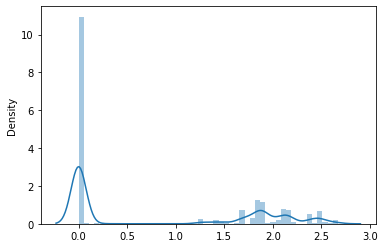

In [114]:
sns.distplot(X_std[:, 7])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

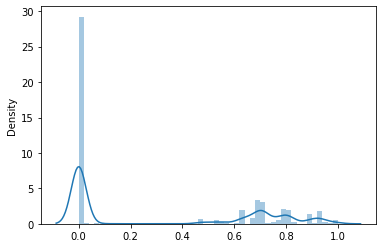

In [115]:
sns.distplot(X_norm[:, 7])

In [116]:
t1_1_keygoal = t1_1_nn[t1_1_nn['ym:s:goalsID'].str.contains('201589066')]
t1_1_keygoal

,ym:s:goalsID,ym:s:bounce,ym:s:deviceCategory,ym:s:endURL,ym:s:goalsSerialNumber,ym:s:lastClickBannerGroupName,ym:s:lastDirectBannerGroup,ym:s:lastDirectClickOrder,ym:s:lastDirectClickOrderName,ym:s:lastDirectConditionType,...,ym:s:offlineCallTalkDuration,ym:s:offlineCallURL,ym:s:pageViews,ym:s:referer,ym:s:screenOrientation,ym:s:screenWidth,ym:s:UTMContent,ym:s:UTMTerm,ym:s:visitDuration,ym:s:watchIDs
242,"[36278473,201589060,201589063,201589066,204564...",0,2,endURL_1,"[0,0,0,0,0]",Headliner new,4892174688,32935915,brend_search_mmo,additional,...,"[191,191,191,191,191]",['http://head-liner.ru/?yadclid=31288516&yador...,1,https://yandex.ru/,1,428,id|38300974762_|cid|32935915|gid|4892174688|ai...,38300974762_,23,"[2706897637418205556,2706903089052123240,27069..."
892,"[45605569,45085622,36278473,36278473,201589066]",0,2,endURL_52,"[1,1,0,0,0]",Keuco - 60348,0,60807631,0,NaN,...,"[0,0,0,172,172]","['','','https://head-liner.ru/','https://head-...",8,https://google.ru/,1,375,NaN,NaN,3719,"[986651505188667581,986653532420046914,9868230..."
1009,"[45605569,36278473,201589060,201589063,201589066]",0,1,endURL_7,"[1,0,0,0,0]",Keuco - 60348,0,60807631,0,NaN,...,"[0,62,62,62,62]","['','http://head-liner.ru/','http://head-liner...",2,NaN,2,1920,spec_all,NaN,33,"[2204092349878632620,2204097217430814877,22041..."
1018,"[45605569,116942056,36276007,36278473,201589066]",0,2,endURL_7,"[1,1,1,0,0]",Keuco - 60348,0,60807631,0,NaN,...,"[0,0,0,153,153]","['','','','http://head-liner.ru/','http://head...",2,NaN,1,428,NaN,NaN,60,"[2982577886410309803,2982579218202493299,29825..."
1102,"[45605569,36276007,36278473,201589060,20158906...",0,2,endURL_25,"[1,1,0,0,0,0]",Keuco - 60348,0,60807631,0,NaN,...,"[0,0,61,61,61,61]","['','','http://head-liner.ru/buying/installmen...",2,http://head-liner.ru/,1,390,NaN,NaN,514,"[2385049250224668964,2385052929284636949,23850..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360244,"[45605569,36278473,201589060,201589063,2015890...",0,2,endURL_9,"[1,0,0,0,0,0]",Headliner,3180216741,32935915,brend_search_mmo,phrase,...,"[0,1529,1529,1529,1529,1529]","['','http://head-liner.ru/?yadclid=31288516&ya...",2,https://yandex.ru/,1,360,id|12527709908_|cid|32935915|gid|3180216741|ai...,12527709908_,19,"[2543931620799545536,2543934410402824384,25439..."
360600,"[45605569,36278473,201589060,201589063,2015890...",0,1,endURL_20,"[1,0,0,0,0,0]",Headliner,3180216741,32935915,brend_search_mmo,phrase,...,"[0,298,298,298,298,298]","['','https://head-liner.ru/','https://head-lin...",4,https://yabs.yandex.ru/count/WpKejI_zOF82NHa0L...,2,1920,id|12337601962_|cid|32935915|gid|3180216741|ai...,12337601962_,494,"[463886146223472900,463888593938284830,4639124..."
361489,"[45605569,152446093,45085622,36278473,20158906...",0,2,endURL_15,"[1,1,1,0,0,0,0,0]",фили сити,4667422736,64927458,konkurenty-sc_search_mmo,NaN,...,"[0,0,0,474,474,474,474,474]","['','','','https://head-liner.ru/','https://he...",5,https://yandex.ru/,1,390,id|33599118456_|cid|64927458|gid|4667422736|ai...,33599118456_,1231,"[915596094952439953,915609798861389920,9156186..."
361517,"[45605569,249595028,249595129,249595330,362784...",0,1,endURL_15,"[1,1,1,1,0,0]",Keuco - 60348,0,60807631,0,NaN,...,"[0,0,0,0,89,89]","['','','','','https://head-liner.ru/','https:/...",2,https://google.com/,2,1512,NaN,NaN,94,"[3655656589361152238,3655659577018155254,36556..."


In [123]:
idx_keygoal = t1_1_keygoal.index.tolist()

In [168]:
y[:] = 0.

<ipython-input-168-a837e8c1707a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[:] = 0.


In [169]:
y.loc[idx_keygoal] = 1.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [172]:
y = np.expand_dims(y, axis=1)

In [173]:
print(X_norm.shape)
print(type(X_norm))
print(y.shape)
print(type(y))

(361919, 27)
<class 'numpy.ndarray'>
(361919, 1)
<class 'numpy.ndarray'>


In [174]:
# Разбивка данных на тренировочную и проверочную выборки
X_train, X_test, y_train, y_test = \
        train_test_split(X_norm, y, test_size=0.3, random_state=0)

In [175]:
print(type(X_train))
print(X_train.shape)
print(type(X_test))
print(X_test.shape)
print(type(y_train))
print(y_train.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(253343, 27)
<class 'numpy.ndarray'>
(108576, 27)
<class 'numpy.ndarray'>
(253343, 1)
<class 'numpy.ndarray'>
(108576, 1)


In [183]:
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [187]:
lr = LogisticRegression(C=10000.0, random_state=0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000.0, random_state=0)

In [188]:
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[108155     52]
 [    63    306]]


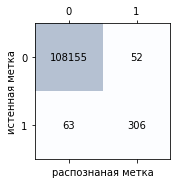

In [189]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Blues', alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('распознаная метка')
plt.ylabel('истенная метка')
plt.show()

In [193]:
print(f'Точность: {precision_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'Полнота: {recall_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'Метрика F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}')

Точность: 0.855
Полнота: 0.829
Метрика F1: 0.842


In [80]:
columns_idx_ohe = []
columns_ohe = []
columns_le = []

for idx, col in enumerate(columns_corr):
    if t1_1_nn[col].nunique() < 100:
        columns_idx_ohe.append(idx)
        columns_ohe.append(col)
    else:
        columns_le.append(col)
    print(f'{col:<35s} {t1_1_nn[col].nunique()}')

ym:s:bounce                         2
ym:s:deviceCategory                 4
ym:s:endURL                         15750
ym:s:goalsSerialNumber              651
ym:s:lastClickBannerGroupName       156
ym:s:lastDirectBannerGroup          241
ym:s:lastDirectClickOrder           61
ym:s:lastDirectClickOrderName       116
ym:s:lastDirectConditionType        4
ym:s:lastDirectPlatform             5106
ym:s:lastDirectPlatformType         2
ym:s:lastReferalSource              4546
ym:s:lastSearchEngine               16
ym:s:lastTrafficSource              10
ym:s:offlineCallFirstTimeCaller     182
ym:s:offlineCallHoldDuration        538
ym:s:offlineCallMissed              89
ym:s:offlineCallTalkDuration        1421
ym:s:offlineCallURL                 456
ym:s:pageViews                      64
ym:s:referer                        22281
ym:s:screenOrientation              3
ym:s:screenWidth                    1119
ym:s:UTMContent                     77047
ym:s:UTMTerm                        8203
ym:s

In [81]:
columns_idx_ohe

[0, 1, 6, 8, 10, 12, 13, 16, 19, 21]

In [82]:
columns_ohe

['ym:s:bounce',
 'ym:s:deviceCategory',
 'ym:s:lastDirectClickOrder',
 'ym:s:lastDirectConditionType',
 'ym:s:lastDirectPlatformType',
 'ym:s:lastSearchEngine',
 'ym:s:lastTrafficSource',
 'ym:s:offlineCallMissed',
 'ym:s:pageViews',
 'ym:s:screenOrientation']

In [83]:
columns_le

['ym:s:endURL',
 'ym:s:goalsSerialNumber',
 'ym:s:lastClickBannerGroupName',
 'ym:s:lastDirectBannerGroup',
 'ym:s:lastDirectClickOrderName',
 'ym:s:lastDirectPlatform',
 'ym:s:lastReferalSource',
 'ym:s:offlineCallFirstTimeCaller',
 'ym:s:offlineCallHoldDuration',
 'ym:s:offlineCallTalkDuration',
 'ym:s:offlineCallURL',
 'ym:s:referer',
 'ym:s:screenWidth',
 'ym:s:UTMContent',
 'ym:s:UTMTerm',
 'ym:s:visitDuration',
 'ym:s:watchIDs']

In [97]:
for col in columns_corr:
    print(X[col].value_counts())
    print()

0    272381
1     89538
Name: ym:s:bounce, dtype: int64

2    203599
1    122281
3     35842
4       197
Name: ym:s:deviceCategory, dtype: int64

1        129143
0         85405
5557      18472
12417     10071
9751       8772
          ...  
11447         1
11448         1
11449         1
11450         1
6390          1
Name: ym:s:endURL, Length: 15750, dtype: int64

650    238971
649     77323
626     22537
396     10943
234      2499
        ...  
531         1
518         1
92          1
357         1
124         1
Name: ym:s:goalsSerialNumber, Length: 651, dtype: int64

10     213503
7       18732
155      8265
141      6198
109      6181
        ...  
49          1
3           1
120         1
58          1
102         1
Name: ym:s:lastClickBannerGroupName, Length: 156, dtype: int64

0      213503
2       13469
50       8145
62       6189
83       6069
        ...  
24          1
231         1
35          1
30          1
139         1
Name: ym:s:lastDirectBannerGroup, Length: 241, 

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
X_trans = np.array

In [ ]:
box_cox_transform = PowerTransformer(method='box-cox', standardize=False) # only works with strictly positive values
yeo_johnson_transform = PowerTransformer(method='yeo-johnson', standardize=False) # works with positive and negative values

X_trans[] = box_cox_transform.fit_transform(train['Age'].values.reshape(train.shape[0],-1))
train['Age_yeo_johnson'] = yeo_johnson_transform.fit_transform(train['Age'].values.reshape(train.shape[0],-1))
train['Age_log'] = np.log(train['Age'].values.reshape(train.shape[0],-1))

In [ ]:
t1_1_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361919 entries, 0 to 361918
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   ym:s:goalsID                     361919 non-null  int64
 1   ym:s:bounce                      361919 non-null  int64
 2   ym:s:deviceCategory              361919 non-null  int64
 3   ym:s:endURL                      361919 non-null  int64
 4   ym:s:goalsSerialNumber           361919 non-null  int64
 5   ym:s:lastClickBannerGroupName    361919 non-null  int64
 6   ym:s:lastDirectBannerGroup       361919 non-null  int64
 7   ym:s:lastDirectClickOrder        361919 non-null  int64
 8   ym:s:lastDirectClickOrderName    361919 non-null  int64
 9   ym:s:lastDirectConditionType     361919 non-null  int64
 10  ym:s:lastDirectPhraseOrCond      361919 non-null  int64
 11  ym:s:lastDirectPlatform          361919 non-null  int64
 12  ym:s:lastDirectPlatformType   

In [ ]:
lr.predict_proba(X_test[13882,:].reshape(1,-1))

array([[0.10110647, 0.89889353]])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
@tf.function
def my_function(x):
    y = tf.square(x)
    z = tf.reduce_sum(y)
    return z


X_train = my_function(X_train)
X_test = my_function(X_test)
y_train = my_function(y_train)
y_test = my_function(y_test)

In [176]:
model = Sequential()

model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))


In [180]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision_score, recall_score, f1_score])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


NotImplementedError: ignored

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred


In [ ]:
t1_1_kor.describe()

,ym:s:goalsID,ym:s:bounce,ym:s:deviceCategory,ym:s:endURL,ym:s:goalsSerialNumber,ym:s:lastClickBannerGroupName,ym:s:lastDirectBannerGroup,ym:s:lastDirectClickOrder,ym:s:lastDirectClickOrderName,ym:s:lastDirectConditionType,...,ym:s:offlineCallTalkDuration,ym:s:offlineCallURL,ym:s:pageViews,ym:s:referer,ym:s:screenOrientation,ym:s:screenWidth,ym:s:UTMContent,ym:s:UTMTerm,ym:s:visitDuration,ym:s:watchIDs
count,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,...,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000,361919.000000
mean,0.003611,0.247398,0.762253,3376.265228,629.718418,43.020698,30.591732,14.044046,35.211760,3.355242,...,1211.696747,399.483846,0.681534,18753.537606,1.357970,383.403123,52940.400686,4987.216499,132.048530,180959.000000
std,0.059986,0.431501,0.618512,4614.283656,80.702822,52.865947,48.905244,7.120292,43.078609,0.945491,...,328.495333,87.880586,1.747933,6208.215345,0.547721,373.927323,28522.570849,3130.478556,321.302302,104477.160375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,649.000000,10.000000,0.000000,13.000000,0.000000,2.000000,...,984.000000,338.000000,0.000000,18413.000000,1.000000,70.000000,25638.500000,1643.000000,8.000000,90479.500000
50%,0.000000,0.000000,1.000000,1.000000,650.000000,10.000000,0.000000,13.000000,0.000000,4.000000,...,1420.000000,455.000000,0.000000,22281.000000,1.000000,118.000000,74835.000000,5337.000000,20.000000,180959.000000
75%,0.000000,0.000000,1.000000,7452.000000,650.000000,81.000000,59.000000,13.000000,80.000000,4.000000,...,1420.000000,455.000000,1.000000,22281.000000,2.000000,740.000000,77047.000000,8203.000000,101.000000,271438.500000
max,1.000000,1.000000,3.000000,15749.000000,650.000000,155.000000,240.000000,60.000000,115.000000,4.000000,...,1420.000000,455.000000,63.000000,22281.000000,2.000000,1118.000000,77047.000000,8203.000000,3285.000000,361918.000000


In [ ]:
t1_1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361919 entries, 0 to 361918
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   ym:s:bounce                      361919 non-null  int64
 1   ym:s:browser                     361919 non-null  int64
 2   ym:s:browserCountry              361919 non-null  int64
 3   ym:s:clientID                    361919 non-null  int64
 4   ym:s:deviceCategory              361919 non-null  int64
 5   ym:s:endURL                      361919 non-null  int64
 6   ym:s:firstGCLID                  361919 non-null  int64
 7   ym:s:goalsID                     361919 non-null  int64
 8   ym:s:hasGCLID                    361919 non-null  int64
 9   ym:s:ipAddress                   361919 non-null  int64
 10  ym:s:isNewUser                   361919 non-null  int64
 11  ym:s:lastAdvEngine               361919 non-null  int64
 12  ym:s:lastClickBannerGroupName 

In [ ]:
cols_name = t1_1_new.columns.tolist()
for col_name in cols_name:
    print(col_name)
    print(t1_1_new[col_name].nunique())
    print()

ym:s:bounce
2

ym:s:browser
49

ym:s:browserCountry
85

ym:s:clientID
258697

ym:s:deviceCategory
4

ym:s:endURL
15750

ym:s:firstGCLID
9284

ym:s:goalsID
2349

ym:s:hasGCLID
2

ym:s:ipAddress
51634

ym:s:isNewUser
2

ym:s:lastAdvEngine
12

ym:s:lastClickBannerGroupName
156

ym:s:lastDirectBannerGroup
241

ym:s:lastDirectClickBanner
3140

ym:s:lastDirectClickBannerName
1550

ym:s:lastDirectClickOrder
61

ym:s:lastDirectClickOrderName
116

ym:s:lastDirectConditionType
4

ym:s:lastDirectPhraseOrCond
3075

ym:s:lastDirectPlatform
5106

ym:s:lastDirectPlatformType
2

ym:s:lastGCLID
10873

ym:s:lastReferalSource
4546

ym:s:lastSearchEngine
16

ym:s:lastSignificantGCLID
10982

ym:s:lastSocialNetwork
11

ym:s:lastTrafficSource
10

ym:s:mobilePhone
120

ym:s:networkType
6

ym:s:pageViews
64

ym:s:referer
22281

ym:s:regionCity
1288

ym:s:screenHeight
1448

ym:s:screenOrientation
3

ym:s:screenWidth
1119

ym:s:startURL
16384

ym:s:UTMCampaign
360

ym:s:UTMContent
77047

ym:s:UTMMedium
22

ym:s:

In [ ]:
t1_1_new.head()

,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:clientID,ym:s:deviceCategory,ym:s:endURL,ym:s:firstGCLID,ym:s:goalsID,ym:s:hasGCLID,ym:s:ipAddress,...,ym:s:screenOrientation,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:watchIDs
0,1,5,79,201300,0,1,9284,2348,0,6537,...,2,1013,1,360,77047,22,89,8203,0,237431
1,1,48,63,204479,1,6862,9284,2348,0,13124,...,1,59,7496,216,76950,2,52,8203,0,243337
2,1,36,85,220170,1,1,9284,2348,0,36409,...,1,70,1,216,76950,2,59,8203,0,272694
3,0,6,63,11196,1,7973,9284,2094,0,46153,...,1,59,1,226,32548,7,79,1799,63,30784
4,1,36,85,205018,1,1,9284,2348,0,13347,...,1,84,1,281,66691,7,79,4530,0,244153


In [ ]:
cols_name = t1_1_new.columns.tolist()
for col_name in cols_name:
    print(col_name)
    print(t1_1_new[col_name].loc[t1_1_new.index[100]])
    print()

ym:s:bounce
0

ym:s:browser
6

ym:s:browserCountry
63

ym:s:clientID
120158

ym:s:deviceCategory
1

ym:s:endURL
1

ym:s:firstGCLID
9284

ym:s:goalsID
[45605569]

ym:s:hasGCLID
0

ym:s:ipAddress
3133

ym:s:isNewUser
0

ym:s:lastAdvEngine
8

ym:s:lastClickBannerGroupName
22

ym:s:lastDirectBannerGroup
105

ym:s:lastDirectClickBanner
880

ym:s:lastDirectClickBannerName
840

ym:s:lastDirectClickOrder
17

ym:s:lastDirectClickOrderName
96

ym:s:lastDirectConditionType
3

ym:s:lastDirectPhraseOrCond
2310

ym:s:lastDirectPlatform
1466

ym:s:lastDirectPlatformType
0

ym:s:lastGCLID
10873

ym:s:lastReferalSource
4546

ym:s:lastSearchEngine
16

ym:s:lastSignificantGCLID
10982

ym:s:lastSocialNetwork
11

ym:s:lastTrafficSource
0

ym:s:mobilePhone
42

ym:s:networkType
5

ym:s:pageViews
1

ym:s:referer
22281

ym:s:regionCity
702

ym:s:screenHeight
447

ym:s:screenOrientation
1

ym:s:screenWidth
59

ym:s:startURL
1

ym:s:UTMCampaign
231

ym:s:UTMContent
15518

ym:s:UTMMedium
7

ym:s:UTMSource
79

ym:

In [ ]:
t1_1_goals = t1_1[t1_1['ym:s:goalsID'] != '[]']

In [ ]:
t1_1_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 68 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       122948 non-null  int64  
 1   Unnamed: 0.1                     122948 non-null  int64  
 2   ym:s:bounce                      122948 non-null  int64  
 3   ym:s:browser                     122931 non-null  object 
 4   ym:s:browserCountry              83831 non-null   object 
 5   ym:s:browserLanguage             122268 non-null  object 
 6   ym:s:clientID                    122948 non-null  uint64 
 7   ym:s:cookieEnabled               122948 non-null  int64  
 8   ym:s:date                        122948 non-null  object 
 9   ym:s:deviceCategory              122948 non-null  int64  
 10  ym:s:endURL                      122948 non-null  object 
 11  ym:s:firstGCLID                  8370 non-null    object 
 12  ym

In [ ]:
cols_name = t1_1_goals.columns.tolist()
for col_name in cols_name:
    print(t1_1_goals[col_name].value_counts())
    print()

3         1
235956    1
237002    1
237001    1
236996    1
         ..
118724    1
118722    1
118719    1
118716    1
361914    1
Name: Unnamed: 0, Length: 122948, dtype: int64

31586    5
6708     5
45803    5
61894    5
54761    5
        ..
33127    1
33128    1
13902    1
13889    1
70420    1
Name: Unnamed: 0.1, Length: 64114, dtype: int64

0    122012
1       936
Name: ym:s:bounce, dtype: int64

chrome               29257
chromemobile         26397
safari_mobile        25681
yandex_browser       13491
safari                5188
edge                  4196
yandexsearch          3939
samsung_internet      3133
firefox               2985
opera                 1916
miui                  1550
android_browser       1445
googlesearch          1161
opera_mobile          1041
huawei_browser         302
firefox_mobile         280
atom                   208
msie                   134
webkit                 133
ucbrowser              113
headlesschrome          82
yandexbrowserlite       75

In [ ]:
t1_1_keygoal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 242 to 361803
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1307 non-null   int64  
 1   Unnamed: 0.1                     1307 non-null   int64  
 2   ym:s:bounce                      1307 non-null   int64  
 3   ym:s:browser                     1307 non-null   object 
 4   ym:s:browserCountry              722 non-null    object 
 5   ym:s:browserLanguage             1306 non-null   object 
 6   ym:s:clientID                    1307 non-null   uint64 
 7   ym:s:cookieEnabled               1307 non-null   int64  
 8   ym:s:date                        1307 non-null   object 
 9   ym:s:deviceCategory              1307 non-null   int64  
 10  ym:s:endURL                      1307 non-null   object 
 11  ym:s:firstGCLID                  146 non-null    object 
 12  ym:s:from       

In [ ]:
cols_name = t1_1_keygoal.columns.tolist()
for col_name in cols_name:
    print(t1_1_keygoal[col_name].value_counts())
    print()

242       1
233153    1
238729    1
238597    1
237808    1
         ..
116825    1
116790    1
116726    1
116290    1
361803    1
Name: Unnamed: 0, Length: 1307, dtype: int64

26502    2
18702    2
32422    2
68117    2
8736     2
        ..
45719    1
45266    1
45231    1
45167    1
70350    1
Name: Unnamed: 0.1, Length: 1299, dtype: int64

0    1243
1      64
Name: ym:s:bounce, dtype: int64

safari_mobile       414
chrome              342
yandex_browser      189
chromemobile        130
safari               64
yandexsearch         43
edge                 35
samsung_internet     30
googlesearch         15
opera                14
miui                 11
firefox              10
android_browser       3
opera_mobile          3
huawei_browser        1
headlesschrome        1
atom                  1
elements_browser      1
Name: ym:s:browser, dtype: int64

ru    659
us     31
gb     22
cn      4
au      2
ee      1
ro      1
it      1
ax      1
Name: ym:s:browserCountry, dtype: int64

ru 

In [ ]:
cols_name = t1_1_keygoal.columns.tolist()
for col_name in cols_name:
    print(col_name)
    print(t1_1_keygoal[col_name].nunique())
    print()

Unnamed: 0
1307

Unnamed: 0.1
1299

ym:s:bounce
2

ym:s:browser
18

ym:s:browserCountry
9

ym:s:browserLanguage
5

ym:s:clientID
1211

ym:s:cookieEnabled
1

ym:s:date
198

ym:s:deviceCategory
4

ym:s:endURL
163

ym:s:firstGCLID
130

ym:s:from
0

ym:s:goalsDateTime
1307

ym:s:goalsID
384

ym:s:goalsPrice
19

ym:s:goalsSerialNumber
128

ym:s:hasGCLID
2

ym:s:impressionsProductCoupon
1

ym:s:ipAddress
771

ym:s:isNewUser
2

ym:s:javascriptEnabled
1

ym:s:lastAdvEngine
8

ym:s:lastClickBannerGroupName
41

ym:s:lastDirectBannerGroup
51

ym:s:lastDirectClickBanner
150

ym:s:lastDirectClickBannerName
93

ym:s:lastDirectClickOrder
26

ym:s:lastDirectClickOrderName
30

ym:s:lastDirectConditionType
4

ym:s:lastDirectPhraseOrCond
112

ym:s:lastDirectPlatform
28

ym:s:lastDirectPlatformType
2

ym:s:lastGCLID
118

ym:s:lastReferalSource
48

ym:s:lastSearchEngine
5

ym:s:lastSearchEngineRoot
2

ym:s:lastSignificantGCLID
132

ym:s:lastSocialNetwork
3

ym:s:lastSocialNetworkProfile
0

ym:s:lastTraffic

In [ ]:
cols_name = t1_1_keygoal.columns.tolist()
for col_name in cols_name:
    print(col_name)
    print(t1_1_keygoal[col_name].loc[t1_1_keygoal.index[1]])
    print()

Unnamed: 0
892

Unnamed: 0.1
892

ym:s:bounce
0

ym:s:browser
safari_mobile

ym:s:browserCountry
nan

ym:s:browserLanguage
ru

ym:s:clientID
1646217942977215474

ym:s:cookieEnabled
1

ym:s:date
2022-03-04

ym:s:deviceCategory
2

ym:s:endURL
endURL_52

ym:s:firstGCLID
nan

ym:s:from
nan

ym:s:goalsDateTime
[\'2022-03-04 16:29:44\',\'2022-03-04 16:52:46\',\'2022-03-04 16:37:10\',\'2022-03-04 16:42:36\',\'2022-03-04 16:42:36\']

ym:s:goalsID
[45605569,45085622,36278473,36278473,201589066]

ym:s:goalsPrice
[0,0,0,0,0]

ym:s:goalsSerialNumber
[1,1,0,0,0]

ym:s:hasGCLID
0

ym:s:impressionsProductCoupon
[]

ym:s:ipAddress
2606:54c0:61c0:20::xxx

ym:s:isNewUser
0

ym:s:javascriptEnabled
1

ym:s:lastAdvEngine
google_adwords

ym:s:lastClickBannerGroupName
Keuco - 60348

ym:s:lastDirectBannerGroup
0

ym:s:lastDirectClickBanner
72057604633335153

ym:s:lastDirectClickBannerName
lastDirectClickBannerName_128

ym:s:lastDirectClickOrder
nan

ym:s:lastDirectClickOrderName
0

ym:s:lastDirectConditionTyp

##t1_20220601_20220621_hits_rg_201589066.csv

In [ ]:
t1_hits = pd.read_csv(os.path.join(PATH_CSV, files_lst[1]))
t1_hits.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:pv:clientID,ym:pv:counterID,ym:pv:date,ym:pv:dateTime,ym:pv:download,ym:pv:GCLID,ym:pv:goalsID,ym:pv:hasGCLID,...,ym:pv:shareTitle,ym:pv:shareURL,ym:pv:title,ym:pv:URL,ym:pv:UTMCampaign,ym:pv:UTMContent,ym:pv:UTMMedium,ym:pv:UTMSource,ym:pv:UTMTerm,ym:pv:watchID
0,0,0,165512636540106471,46973610,2022-06-19,2022-06-19 22:31:31,0,NaN,[],0,...,title_305,URL_2801,title_1,URL_198,NaN,NaN,NaN,NaN,NaN,3427655923630866578
1,1,1,1655654621387522390,46973610,2022-06-19,2022-06-19 19:03:41,0,NaN,[],0,...,title_306,URL_2802,title_0,URL_0,geo-fili_net_mmo|60807631,id|0_|cid|60807631|gid|4534548848|aid|10596390...,cpc,yandex,0_,3412543810150596657
2,2,2,1655654621387522390,46973610,2022-06-19,2022-06-19 19:03:41,0,NaN,[],0,...,title_307,URL_2803,title_2,URL_0,geo-fili_net_mmo|60807631,id|0_|cid|60807631|gid|4534548848|aid|10596390...,cpc,yandex,0_,3412543879562133651
3,3,3,1655654621387522390,46973610,2022-06-19,2022-06-19 19:03:51,0,NaN,[],0,...,title_308,URL_2804,title_0,URL_0,geo-fili_net_mmo|60807631,id|0_|cid|60807631|gid|4534548848|aid|10596390...,cpc,yandex,0_,3412546296359157992
4,4,4,1655654621387522390,46973610,2022-06-19,2022-06-19 19:03:52,0,NaN,[],0,...,title_309,URL_2805,title_1,URL_0,geo-fili_net_mmo|60807631,id|0_|cid|60807631|gid|4534548848|aid|10596390...,cpc,yandex,0_,3412546772146847864


In [ ]:
t1_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147186 entries, 0 to 147185
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      147186 non-null  int64  
 1   Unnamed: 0.1                    147186 non-null  int64  
 2   ym:pv:clientID                  147186 non-null  uint64 
 3   ym:pv:counterID                 147186 non-null  int64  
 4   ym:pv:date                      147186 non-null  object 
 5   ym:pv:dateTime                  147186 non-null  object 
 6   ym:pv:download                  147186 non-null  int64  
 7   ym:pv:GCLID                     211 non-null     object 
 8   ym:pv:goalsID                   147186 non-null  object 
 9   ym:pv:hasGCLID                  147186 non-null  int64  
 10  ym:pv:httpError                 147186 non-null  int64  
 11  ym:pv:iFrame                    147186 non-null  int64  
 12  ym:pv:isPageView

In [ ]:
t1_hits_goals = t1_hits[t1_hits['ym:pv:goalsID'] != '[]']
t1_hits_goals

,Unnamed: 0,Unnamed: 0.1,ym:pv:clientID,ym:pv:counterID,ym:pv:date,ym:pv:dateTime,ym:pv:download,ym:pv:GCLID,ym:pv:goalsID,ym:pv:hasGCLID,...,ym:pv:shareTitle,ym:pv:shareURL,ym:pv:title,ym:pv:URL,ym:pv:UTMCampaign,ym:pv:UTMContent,ym:pv:UTMMedium,ym:pv:UTMSource,ym:pv:UTMTerm,ym:pv:watchID
47,47,47,1655643057948367286,46973610,2022-06-19,2022-06-19 21:50:17,0,NaN,[66245989],0,...,title_352,URL_2848,title_0,URL_789,NaN,NaN,NaN,NaN,NaN,3415164290714566691
59,59,59,1655669011552640270,46973610,2022-06-19,2022-06-19 23:04:20,0,NaN,[152446093],0,...,title_364,URL_2860,title_5,URL_1834,NaN,NaN,NaN,NaN,NaN,3416328809053421580
133,133,133,165564957651556287,46973610,2022-06-19,2022-06-19 17:42:11,0,NaN,[152446093],0,...,title_438,URL_2934,title_4,URL_1833,NaN,NaN,NaN,NaN,NaN,3411261934353252481
146,146,146,165564957651556287,46973610,2022-06-19,2022-06-19 17:54:35,0,NaN,[152446093],0,...,title_451,URL_2947,title_13,URL_1833,NaN,NaN,NaN,NaN,NaN,3411456988737962276
177,177,177,16245254323502978,46973610,2022-06-19,2022-06-19 19:44:42,0,NaN,[66245989],0,...,title_482,URL_2978,title_0,URL_28,NaN,NaN,NaN,NaN,NaN,3413189045045166231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146589,146589,146589,1603011432296764554,46973610,2022-06-12,2022-06-12 12:36:09,0,NaN,[66245989],0,...,title_146894,URL_149390,title_0,URL_255,NaN,NaN,NaN,NaN,NaN,3247903996580987150
146593,146593,146593,1603011432296764554,46973610,2022-06-12,2022-06-12 14:25:21,0,NaN,[66245989],0,...,title_146898,URL_149394,title_0,URL_255,NaN,NaN,NaN,NaN,NaN,3249621586821251266
146781,146781,146781,1600263605236517204,46973610,2022-06-12,2022-06-12 12:03:53,0,NaN,[152446093],0,...,title_147086,URL_149582,title_14,URL_1833,NaN,NaN,NaN,NaN,NaN,3247396291697443142
146999,146999,146999,1655047675658952453,46973610,2022-06-12,2022-06-12 18:54:15,0,NaN,[152446093],0,...,title_147304,URL_149800,title_4,URL_1833,NaN,NaN,NaN,NaN,NaN,3253850772097466636


In [ ]:
cols_name = t1_hits_goals.columns.tolist()
for col_name in cols_name:
    print(t1_hits_goals[col_name].value_counts())
    print()

47        1
92753     1
92371     1
92396     1
92413     1
         ..
45259     1
45263     1
45412     1
45418     1
147015    1
Name: Unnamed: 0, Length: 3222, dtype: int64

47        1
92753     1
92371     1
92396     1
92413     1
         ..
45259     1
45263     1
45412     1
45418     1
147015    1
Name: Unnamed: 0.1, Length: 3222, dtype: int64

1645825350433166140    35
1610354995706874142    31
1624694173473658542    27
1654147427494624260    22
15759707322105625      21
                       ..
1654788128333317676     1
1654758851511133520     1
1647521847632972162     1
1648454527719804146     1
1654241423372185045     1
Name: ym:pv:clientID, Length: 1948, dtype: int64

46973610    3222
Name: ym:pv:counterID, dtype: int64

2022-06-14    198
2022-06-21    194
2022-06-08    191
2022-06-07    182
2022-06-09    182
2022-06-02    174
2022-06-17    173
2022-06-06    169
2022-06-01    167
2022-06-16    163
2022-06-10    156
2022-06-11    156
2022-06-20    149
2022-06-15    146


In [ ]:
t1_hits_keygoal = t1_hits_goals[t1_hits_goals['ym:pv:goalsID'].str.contains('201589066')]
t1_hits_keygoal

,Unnamed: 0,Unnamed: 0.1,ym:pv:clientID,ym:pv:counterID,ym:pv:date,ym:pv:dateTime,ym:pv:download,ym:pv:GCLID,ym:pv:goalsID,ym:pv:hasGCLID,...,ym:pv:shareTitle,ym:pv:shareURL,ym:pv:title,ym:pv:URL,ym:pv:UTMCampaign,ym:pv:UTMContent,ym:pv:UTMMedium,ym:pv:UTMSource,ym:pv:UTMTerm,ym:pv:watchID


In [ ]:
cols_name = t1_hits_keygoal.columns.tolist()
for col_name in cols_name:
    print(t1_hits_keygoal[col_name].value_counts())
    print()

Series([], Name: Unnamed: 0, dtype: int64)

Series([], Name: Unnamed: 0.1, dtype: int64)

Series([], Name: ym:pv:clientID, dtype: int64)

Series([], Name: ym:pv:counterID, dtype: int64)

Series([], Name: ym:pv:date, dtype: int64)

Series([], Name: ym:pv:dateTime, dtype: int64)

Series([], Name: ym:pv:download, dtype: int64)

Series([], Name: ym:pv:GCLID, dtype: int64)

Series([], Name: ym:pv:goalsID, dtype: int64)

Series([], Name: ym:pv:hasGCLID, dtype: int64)

Series([], Name: ym:pv:httpError, dtype: int64)

Series([], Name: ym:pv:iFrame, dtype: int64)

Series([], Name: ym:pv:isPageView, dtype: int64)

Series([], Name: ym:pv:lastSocialNetwork, dtype: int64)

Series([], Name: ym:pv:lastSocialNetworkProfile, dtype: int64)

Series([], Name: ym:pv:link, dtype: int64)

Series([], Name: ym:pv:networkType, dtype: int64)

Series([], Name: ym:pv:notBounce, dtype: int64)

Series([], Name: ym:pv:referer, dtype: int64)

Series([], Name: ym:pv:shareService, dtype: int64)

Series([], Name: ym:pv:s

##t1_20220601_20220621_rg_201589066.csv

In [ ]:
t1_2 = pd.read_csv(os.path.join(PATH_CSV, files_lst[2]))
t1_2

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,0,0,chromemobile,ru,ru,1654611153552556786,1,2022-06-07,2,...,360,startURL_1,it-sector_net_mmo|74743975,id|32603561_32603561|cid|74743975|gid|49243022...,cpc,yandex,32603561_32603561,26,3139005046174777676,"[3139005046174777676,3139008871078297932]"
1,1,1,1,chromemobile,ru,ru,1654449586138573715,1,2022-06-05,2,...,360,startURL_0,prigranichye_net_mir|74741535,id|0_|cid|74741535|gid|4924248375|aid|12202263...,cpc,yandex,0_,0,3096668008510128269,[3096668008510128269]
2,2,2,0,safari_mobile,NaN,ru,1655697433446562730,1,2022-06-20,3,...,834,startURL_2,june22,s2,banner,onetarget,%site_id%,65,3423766555207663830,"[3423766555207663830,3423783440562520111,34237..."
3,3,3,0,chromemobile,ee,et,1655014908449840051,1,2022-06-12,2,...,360,startURL_0,prigranichye_net_mir|74741535,id|39038979471_|cid|74741535|gid|4924248372|ai...,cpc,yandex,39038979471_,107,3244846918567985478,"[3244846918567985478,3244874949540184432]"
4,4,4,1,chromemobile,us,en,165519505148800963,1,2022-06-14,2,...,360,startURL_0,prigranichye_net_mir|74741535,id|39038979701_|cid|74741535|gid|4924248374|ai...,cpc,yandex,39038979701_,1,3292070116363862072,[3292070116363862072]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33955,33955,33955,0,chromemobile,ru,ru,1655802524706257401,1,2022-06-21,2,...,760,startURL_0,geo-fili_net_mmo|60807631,id|0_|cid|60807631|gid|4534548848|aid|10596390...,cpc,yandex,0_,16,3451315512074305836,"[3451315512074305836,3451319678740988022]"
33956,33956,33956,1,chromemobile,ru,ru,1655570212869367974,1,2022-06-18,2,...,360,startURL_1,june22,s2,banner,onetarget,%site_id%,0,3390416759538319614,[3390416759538319614]
33957,33957,33957,0,chromemobile,ru,ru,1653810735921950662,1,2022-06-05,3,...,1102,startURL_0,it-sector_net_mmo|74743975,id|32603561_32603561|cid|74743975|gid|49243022...,cpc,yandex,32603561_32603561,16,3091396916205846866,"[3091396916205846866,3091401183364645147]"
33958,33958,33958,0,yandexsearch,ru,ru,1655554697904653338,1,2022-06-18,2,...,854,startURL_0,geo-ulitsy_search_mmo|74947126,id|39185785942_|cid|74947126|gid|4931561596|ai...,cpc,yandex,39185785942_,16,3386349450594877685,"[3386349450594877685,3386353403618918686]"


In [ ]:
t1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33960 entries, 0 to 33959
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       33960 non-null  int64  
 1   Unnamed: 0.1                     33960 non-null  int64  
 2   ym:s:bounce                      33960 non-null  int64  
 3   ym:s:browser                     33956 non-null  object 
 4   ym:s:browserCountry              25279 non-null  object 
 5   ym:s:browserLanguage             33808 non-null  object 
 6   ym:s:clientID                    33960 non-null  uint64 
 7   ym:s:cookieEnabled               33960 non-null  int64  
 8   ym:s:date                        33960 non-null  object 
 9   ym:s:deviceCategory              33960 non-null  int64  
 10  ym:s:endURL                      33960 non-null  object 
 11  ym:s:firstGCLID                  365 non-null    object 
 12  ym:s:from         

In [ ]:
t1_2_goals = t1_2[t1_2['ym:s:goalsID'] != '[]']
t1_2_goals

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
3,3,3,0,chromemobile,ee,et,1655014908449840051,1,2022-06-12,2,...,360,startURL_0,prigranichye_net_mir|74741535,id|39038979471_|cid|74741535|gid|4924248372|ai...,cpc,yandex,39038979471_,107,3244846918567985478,"[3244846918567985478,3244874949540184432]"
14,14,14,0,chrome,ru,ru,1614617591621131651,1,2022-06-05,1,...,1366,startURL_4,NaN,NaN,NaN,NaN,NaN,62,3090782922758946818,"[3090782922758946818,3090792500149092428,30917..."
19,19,19,0,safari_mobile,ru,ru,1654775416550087301,1,2022-06-09,2,...,375,startURL_5,NaN,NaN,NaN,NaN,NaN,1045,3182065689793134644,"[3182065689793134644,3182071007592841243,31820..."
23,23,23,0,yandexsearch,NaN,NaN,1654577963387626745,1,2022-06-07,2,...,0,startURL_0,june22,spec_all,banner,vsenovostroyki,NaN,80,3130499291685060711,"[3130499291685060711,3130501437045866794,31305..."
25,25,25,0,safari_mobile,NaN,ru,1653939920779185605,1,2022-06-02,2,...,428,startURL_0,NaN,NaN,NaN,NaN,NaN,146,3026047651976315011,"[3026047651976315011,3026051367924400463,30260..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33938,33938,33938,0,yandex_browser,ru,ru,1654957182449398916,1,2022-06-11,2,...,360,startURL_0,geo-shelepiha_net_mmo|60806842,id|31107349371_|cid|60806842|gid|4534532994|ai...,cpc,yandex,31107349371_,1151,3229714572932808827,"[3229714572932808827,3230016376544428287,32297..."
33943,33943,33943,0,chrome,ru,ru,16298850201010368669,1,2022-06-09,1,...,1920,startURL_0,brend_search_rf|33943744,id|12805468451_|cid|33943744|gid|3258952540|ai...,cpc,yandex,12805468451_,986,3180214259093340413,"[3180214259093340413,3180219266370895893,31804..."
33945,33945,33945,0,yandex_browser,ru,ru,1655416138554450844,1,2022-06-17,3,...,1024,startURL_0,june22,spec_all,banner,kvartirny-control,NaN,345,3350027220087734418,"[3350027220087734418,3350117400497619307,33500..."
33948,33948,33948,0,safari_mobile,ru,ru,1654183734539397491,1,2022-06-02,2,...,375,startURL_0,geo-fili_net_mmo|60807631,id|31107655536_|cid|60807631|gid|4534548850|ai...,cpc,yandex,31107655536_,633,3026959946325688451,"[3026959946325688451,3027119501747945519,30271..."


In [ ]:
cols_name = t1_2_goals.columns.tolist()
for col_name in cols_name:
    print(t1_2_goals[col_name].value_counts())
    print()

3        1
22757    1
22742    1
22746    1
22748    1
        ..
11323    1
11322    1
11321    1
11318    1
33950    1
Name: Unnamed: 0, Length: 8917, dtype: int64

3        1
22757    1
22742    1
22746    1
22748    1
        ..
11323    1
11322    1
11321    1
11318    1
33950    1
Name: Unnamed: 0.1, Length: 8917, dtype: int64

0    8851
1      66
Name: ym:s:bounce, dtype: int64

chrome               2146
safari_mobile        2027
chromemobile         1687
yandex_browser       1060
safari                377
yandexsearch          330
edge                  304
samsung_internet      276
firefox               152
opera                 145
miui                  122
android_browser        59
googlesearch           53
opera_mobile           50
firefox_mobile         23
huawei_browser         22
msie                   20
atom                   14
webkit                 14
headlesschrome         11
ucbrowser               8
yandexbrowserlite       4
chromium                3
maxthon      

In [ ]:
t1_2_keygoal = t1_2_goals[t1_2_goals['ym:s:goalsID'].str.contains('201589066')]
t1_2_keygoal

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
226,226,226,0,safari_mobile,gb,en,1655728234132898728,1,2022-06-20,2,...,375,startURL_32,NaN,NaN,NaN,NaN,NaN,160,3431840962112651609,"[3431840962112651609,3431859330821390655,34318..."
308,308,308,0,chrome,ru,ru,1643798439161814369,1,2022-06-09,1,...,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,223,3177765843816677554,"[3177765843816677554,3177824129742799118,31777..."
617,617,617,0,safari_mobile,NaN,ru,1654477447329111926,1,2022-06-12,2,...,414,startURL_1,NaN,NaN,NaN,vk,NaN,1104,3244465632484000021,"[3244465632484000021,3244735600752853186,32447..."
843,843,843,0,safari_mobile,NaN,ru,1648326375920193748,1,2022-06-09,2,...,428,startURL_42,NaN,NaN,NaN,NaN,NaN,81,3177123950043332864,"[3177123950043332864,3177134780965191779,31771..."
1072,1072,1072,0,yandex_browser,NaN,ru,1654688142567135318,1,2022-06-08,1,...,1536,startURL_0,brend_search_mmo|32935915,id|12527709908_|cid|32935915|gid|3180216741|ai...,cpc,yandex,12527709908_,1539,3160262276910678081,"[3160262276910678081,3160279880639709454,31602..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33581,33581,33581,0,yandexsearch,us,en,165512531486896327,1,2022-06-13,2,...,393,startURL_0,brend_search_mmo|32935915,id|38300974729_|cid|32935915|gid|4892174688|ai...,cpc,yandex,38300974729_,232,3273797910087860440,"[3273797910087860440,3273799171444047879,32738..."
33630,33630,33630,0,chrome,ru,ru,165478817718897527,1,2022-06-09,1,...,1536,startURL_1,NaN,NaN,NaN,NaN,NaN,1496,3185410546398658736,"[3185410546398658736,3185413732115415216,31854..."
33663,33663,33663,0,yandex_browser,NaN,ru,1653231997514383913,1,2022-06-11,1,...,1366,startURL_0,brend_search_rf|33943744,id|38301293216_|cid|33943744|gid|4892184672|ai...,cpc,yandex,38301293216_,1220,3229278039795564674,"[3229278039795564674,3229301633754857602,32293..."
33776,33776,33776,0,safari_mobile,NaN,ru,165407893348488730,1,2022-06-01,2,...,320,startURL_1,NaN,NaN,NaN,NaN,NaN,1210,2999486492792324166,"[2999486492792324166,2999489925315821590,29994..."


In [ ]:
cols_name = t1_2_keygoal.columns.tolist()
for col_name in cols_name:
    print(t1_2_keygoal[col_name].value_counts())
    print()

226      1
20375    1
24293    1
24149    1
23842    1
        ..
9411     1
9033     1
8998     1
8526     1
33868    1
Name: Unnamed: 0, Length: 119, dtype: int64

226      1
20375    1
24293    1
24149    1
23842    1
        ..
9411     1
9033     1
8998     1
8526     1
33868    1
Name: Unnamed: 0.1, Length: 119, dtype: int64

0    115
1      4
Name: ym:s:bounce, dtype: int64

safari_mobile       45
chrome              24
chromemobile        21
yandex_browser      12
yandexsearch         7
googlesearch         3
safari               3
edge                 2
samsung_internet     1
opera                1
Name: ym:s:browser, dtype: int64

ru    55
us     2
gb     1
ro     1
Name: ym:s:browserCountry, dtype: int64

ru    115
en      3
ro      1
Name: ym:s:browserLanguage, dtype: int64

1648326375920193748     3
1654670025148660543     2
16550398561068645286    2
1649696542334470275     2
1654427106183682578     2
                       ..
1655468846656437196     1
1655464035683494019 

##t2_20190101_20191231_rg_201711160.csv

In [ ]:
t2 = pd.read_csv(os.path.join(PATH_CSV, files_lst[3]))
t2

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,0,0,safari_mobile,ru,ru,1568532450714263888,1,2019-09-29,2,...,375,startURL_1,NaN,NaN,NaN,NaN,NaN,22,5.725991e+18,"[5725991147596353144,5725996887931293007]"
1,1,1,0,chromemobile,ru,ru,1569566004995980767,1,2019-09-27,2,...,412,startURL_2,new-vatutinki,NaN,spec,NaN,NaN,16,5.668498e+18,"[5668498476022042292,5668502585934024242]"
2,2,2,0,yandex_browser,NaN,ru,1550309326627471086,1,2019-04-21,1,...,1920,startURL_0,NaN,NaN,NaN,NaN,NaN,173,2.070024e+18,[2070023755919723865]
3,3,3,0,chrome,ru,ru,1550243592671325593,1,2019-02-15,1,...,1920,startURL_0,NaN,NaN,NaN,NaN,NaN,47,6.032437e+17,"[603243711130439158,603253385173339757,6032550..."
4,4,4,0,chromemobile,ru,ru,1565771662852000729,1,2019-08-18,2,...,360,startURL_3,Retargeting_Zhilaya_Allvisitors_90day_MskMo_Al...,7876665342,cpc,YDirect,кленовые аллеи жк ватутинки,144,4.763848e+18,"[4763848416218778967,4763851238426742381,47638..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831056,831056,46125,1,safari_mobile,ru,ru,1548945112222121916,1,2019-09-14,2,...,375,startURL_28,NaN,NaN,NaN,NaN,NaN,9,5.373513e+18,"[5373513074457382221,5373515101367897421]"
831057,831057,46126,0,yandexsearch,ru,ru,1567923713452254203,1,2019-09-08,2,...,360,startURL_401,Network_Zhilaya_Geo_Vatutinki_MskMo_Alldevices...,7967638881,cpc,YDirect,купить однокомнатную квартиру новых ватутинках,81,5.237983e+18,"[5237983267588607628,5237991275283287652,52379..."
831058,831058,46127,0,msie,ru,ru,1552995796406190609,1,2019-03-19,1,...,1600,startURL_74263,Network_Zhilaya_Geo_NewMoscow_MskMo_Alldevices...,6320207271,cpc,YDirect,купить квартиру в новой москве,17,1.324793e+18,[1324792622715965028]
831059,831059,46128,0,chrome,ru,ru,1553091533259533965,1,2019-03-20,1,...,1920,startURL_32,Search_Zhilaya_Brand_MskMo_Alldevices_YDirect,6457930007,cpc,YDirect,ново ватутинки,343,1.349815e+18,"[1349814684842135349,1349820506484969319,13498..."


In [ ]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831061 entries, 0 to 831060
Data columns (total 68 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       831061 non-null  int64  
 1   Unnamed: 0.1                     831061 non-null  int64  
 2   ym:s:bounce                      831061 non-null  int64  
 3   ym:s:browser                     830971 non-null  object 
 4   ym:s:browserCountry              673973 non-null  object 
 5   ym:s:browserLanguage             830552 non-null  object 
 6   ym:s:clientID                    831061 non-null  uint64 
 7   ym:s:cookieEnabled               831061 non-null  int64  
 8   ym:s:date                        831061 non-null  object 
 9   ym:s:deviceCategory              831061 non-null  int64  
 10  ym:s:endURL                      831061 non-null  object 
 11  ym:s:firstGCLID                  47674 non-null   object 
 12  ym

In [ ]:
t2_goals = t2[t2['ym:s:goalsID'] != '[]']
t2_goals

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
7,7,7,0,opera,ru,ru,156469340922509339,1,2019-10-07,1,...,1280,startURL_0,NaN,NaN,NaN,NaN,NaN,166,5.887634e+18,"[5887634329389436246,5887638489437507062,58876..."
8,8,8,1,chromemobile,ru,ru,157760140086343016,1,2019-12-29,2,...,412,startURL_5,Discovery_MskMo_Alldevices_GAds,{ad_id},cpc,GAds,NaN,0,7.774929e+18,[7774928899900641098]
15,15,15,0,yandexsearch,NaN,ru,1572769648669060553,1,2019-11-10,2,...,360,startURL_11,Network_Zhilaya_Brand_MskMo_Alldevices_YDirect,8242206596,cpc,NaN,однокомнатные квартиры ватутинках,60,6.674989e+18,"[6674989083002867490,6674995108161720098,66750..."
18,18,18,0,chrome,ru,ru,1568282599887022741,0,2019-09-12,1,...,1536,startURL_0,NaN,NaN,NaN,NaN,NaN,147,5.332061e+18,"[5332060977394028272,5332065096773865200,53320..."
23,23,23,0,chromemobile,ru,ru,1570291731736247086,1,2019-11-02,2,...,320,startURL_18,Network_Zhilaya_Geo_Vatutinki_MskMo_Alldevices...,8242204968,cpc,NaN,жк ватутинки,107,6.489792e+18,"[6489792166931664354,6489796560448589282,64898..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831010,831010,46079,0,chromemobile,ru,ru,1571071227512487097,1,2019-11-11,3,...,962,startURL_131557,Network_Zhilaya_Competitor_MskMo_Alldevices_YD...,7876665360,cpc,YDirect,жк аллея,124,6.693467e+18,"[6693467296014470577,6693476098964917681,66934..."
831021,831021,46090,0,chromemobile,ru,ru,1577112512330318130,1,2019-12-24,2,...,393,startURL_0,NaN,NaN,NaN,NaN,NaN,474,7.670920e+18,"[7670919751241240144,7670932730352438703,76709..."
831029,831029,46098,0,firefox,ru,ru,1573392231333390004,1,2019-11-12,1,...,1366,startURL_45,NaN,NaN,NaN,NaN,NaN,16,6.721290e+18,"[6721289745560702744,6721293812368871192]"
831048,831048,46117,0,edge,ru,ru,1574237488974279438,1,2019-11-24,1,...,1280,startURL_103,Search_Zhilaya_Brand_MskMo_Alldevices_YDirect,8113745637,cpc,YDirect,новые ватутинки,26,6.993203e+18,"[6993202809635016083,6993204557301353995,69932..."


In [ ]:
cols_name = t2_goals.columns.tolist()
for col_name in cols_name:
    print(t2_goals[col_name].value_counts())
    print()

7         1
553126    1
555233    1
555252    1
555253    1
         ..
277952    1
277960    1
277963    1
277968    1
831052    1
Name: Unnamed: 0, Length: 196714, dtype: int64

3767     13
8930     13
9048     12
45934    12
31581    12
         ..
50407     1
50406     1
50382     1
50376     1
45426     1
Name: Unnamed: 0.1, Length: 50674, dtype: int64

0    183154
1     13560
Name: ym:s:bounce, dtype: int64

chrome               45161
yandex_browser       36684
chromemobile         34347
safari_mobile        22239
yandexsearch         14069
opera                 9759
firefox               9242
samsung_internet      5770
miui                  4135
edge                  3907
msie                  3489
android_browser       2223
safari                1747
opera_mobile          1057
googlesearch          1046
mzbrowser              397
amigo                  310
firefox_mobile         294
ucbrowser              219
yandexbrowserlite      174
operamini               96
vivaldi        

In [ ]:
t2_keygoal = t2_goals[t2_goals['ym:s:goalsID'].str.contains('201711160')]
t2_keygoal

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs


In [ ]:
t2_keygoal['ym:s:goalsID']

Series([], Name: ym:s:goalsID, dtype: object)

In [ ]:
cols_name = t1_2_keygoal.columns.tolist()
for col_name in cols_name:
    print(t1_2_keygoal[col_name].value_counts())
    print()

##t3_20220101_20230106 rg_184390113,199898941.csv

In [ ]:
t3 = pd.read_csv(os.path.join(PATH_CSV, files_lst[4]))
t3

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,0,0,chromemobile,us,en,1665992194790477826,1,2022-10-17,2,...,360,startURL_1,dream_towers,august,tgb,vsenovostroyki,NaN,23,6122477060664852793,"[6122477060664852793,6122482889679438122]"
1,1,1,0,chrome,ru,ru,1651588812834361632,1,2022-05-11,1,...,1920,startURL_2,december,spec,banner,realty,NaN,20,2524660852467171585,"[2524660852467171585,2524665888040026335,25246..."
2,2,2,0,yandexsearch,ru,ru,1669216880843830398,1,2022-11-23,2,...,360,startURL_3,habits_rsy_mmo|78802493,id|36875084_36875084|cid|78802493|gid|50407963...,cpc,yandex,36875084_36875084,36,6967809303147970818,"[6967809303147970818,6967811277813711026,69678..."
3,3,3,0,chromemobile,ru,ru,1668532989948656583,1,2022-11-15,2,...,393,startURL_4,retargeting_rsy_mmo|80358774,id|38799185_38799185|cid|80358774|gid|50700864...,cpc,yandex,38799185_38799185,14,6788530914224504848,"[6788530914224504848,6788534545226924048]"
4,4,4,0,chromemobile,ru,ru,1663845580761327465,1,2022-09-23,2,...,393,startURL_5,y_dt_net_retargeting_rf-all|76849744,id|34638260_34638260|cid|76849744|gid|49875270...,cpc,yandex,34638260_34638260,24,5579476465689821455,"[5579476465689821455,5579476581730222351,55794..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734353,734353,61586,0,chromemobile,ru,ru,1645857449897789669,1,2022-02-26,2,...,442,startURL_156965,y_dt_net_location_mob_mmo|67980631,id|36379401868_|cid|67980631|gid|4818853894|ai...,cpc,yandex,36379401868_,52,844273739810996237,"[844273739810996237,844286768859316421,8442872..."
734354,734354,61587,0,chromemobile,ru,ru,1667898829694888653,1,2022-11-08,2,...,393,startURL_76,retargeting_rsy_mmo|80358774,id|38799185_38799185|cid|80358774|gid|50700864...,cpc,yandex,38799185_38799185,25,6622289714721063019,"[6622289714721063019,6622293634329346214]"
734355,734355,61588,0,chromemobile,ru,ru,166789549734457673,1,2022-11-08,2,...,393,startURL_338,retargeting_rsy_rf|76849744,id|38799117_38799117|cid|76849744|gid|50700855...,cpc,yandex,38799117_38799117,26,6621415961863913649,"[6621415961863913649,6621422927322284209,66214..."
734356,734356,61589,0,chrome,NaN,ru,1668349132458474558,1,2022-11-13,1,...,1366,startURL_156966,NaN,NaN,NaN,NaN,NaN,24,6740333765098733824,"[6740333765098733824,6740338635665571872,67403..."


In [ ]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734358 entries, 0 to 734357
Data columns (total 68 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       734358 non-null  int64  
 1   Unnamed: 0.1                     734358 non-null  int64  
 2   ym:s:bounce                      734358 non-null  int64  
 3   ym:s:browser                     734292 non-null  object 
 4   ym:s:browserCountry              618913 non-null  object 
 5   ym:s:browserLanguage             730914 non-null  object 
 6   ym:s:clientID                    734358 non-null  uint64 
 7   ym:s:cookieEnabled               734358 non-null  int64  
 8   ym:s:date                        734358 non-null  object 
 9   ym:s:deviceCategory              734358 non-null  int64  
 10  ym:s:endURL                      734358 non-null  object 
 11  ym:s:firstGCLID                  26645 non-null   object 
 12  ym

In [ ]:
t3_goals = t3[t3['ym:s:goalsID'] != '[]']
t3_goals

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
1,1,1,0,chrome,ru,ru,1651588812834361632,1,2022-05-11,1,...,1920,startURL_2,december,spec,banner,realty,NaN,20,2524660852467171585,"[2524660852467171585,2524665888040026335,25246..."
2,2,2,0,yandexsearch,ru,ru,1669216880843830398,1,2022-11-23,2,...,360,startURL_3,habits_rsy_mmo|78802493,id|36875084_36875084|cid|78802493|gid|50407963...,cpc,yandex,36875084_36875084,36,6967809303147970818,"[6967809303147970818,6967811277813711026,69678..."
4,4,4,0,chromemobile,ru,ru,1663845580761327465,1,2022-09-23,2,...,393,startURL_5,y_dt_net_retargeting_rf-all|76849744,id|34638260_34638260|cid|76849744|gid|49875270...,cpc,yandex,34638260_34638260,24,5579476465689821455,"[5579476465689821455,5579476581730222351,55794..."
5,5,5,0,chromemobile,ru,ru,1665418996387045459,1,2022-10-10,2,...,393,startURL_6,y_dt_net_competitors_rf-all|78802503,id|41566070979_|cid|78802503|gid|5052258972|ai...,cpc,yandex,41566070979_,37,5972216148158054550,"[5972216148158054550,5972225818379157654,59722..."
6,6,6,0,firefox,us,en,1657878115826533753,1,2022-07-15,1,...,1280,startURL_1,dream_towers,july,banner,realty,NaN,211,3993532074723901702,"[3993532074723901702,3993532310839623780,39935..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734352,734352,61585,0,yandex_browser,ru,ru,166445953049228226,1,2022-09-29,2,...,393,startURL_4,y_dt_net_retargeting_rf-all|76849744,id|34638260_34638260|cid|76849744|gid|49875270...,cpc,yandex,34638260_34638260,36,5720700222690820132,"[5720700222690820132,5720709765244649474,57207..."
734353,734353,61586,0,chromemobile,ru,ru,1645857449897789669,1,2022-02-26,2,...,442,startURL_156965,y_dt_net_location_mob_mmo|67980631,id|36379401868_|cid|67980631|gid|4818853894|ai...,cpc,yandex,36379401868_,52,844273739810996237,"[844273739810996237,844286768859316421,8442872..."
734355,734355,61588,0,chromemobile,ru,ru,166789549734457673,1,2022-11-08,2,...,393,startURL_338,retargeting_rsy_rf|76849744,id|38799117_38799117|cid|76849744|gid|50700855...,cpc,yandex,38799117_38799117,26,6621415961863913649,"[6621415961863913649,6621422927322284209,66214..."
734356,734356,61589,0,chrome,NaN,ru,1668349132458474558,1,2022-11-13,1,...,1366,startURL_156966,NaN,NaN,NaN,NaN,NaN,24,6740333765098733824,"[6740333765098733824,6740338635665571872,67403..."


In [ ]:
cols_name = t3_goals.columns.tolist()
for col_name in cols_name:
    print(t3_goals[col_name].value_counts())
    print()

1         1
488894    1
488909    1
488907    1
488906    1
         ..
245434    1
245428    1
245427    1
245426    1
734357    1
Name: Unnamed: 0, Length: 392424, dtype: int64

8485     12
7327     12
10876    12
26793    12
30231    12
         ..
32045     1
61624     1
61039     1
61618     1
61568     1
Name: Unnamed: 0.1, Length: 61709, dtype: int64

0    384812
1      7612
Name: ym:s:bounce, dtype: int64

chromemobile         188709
chrome                62817
yandex_browser        56579
safari_mobile         35825
firefox               12498
yandexsearch           9929
edge                   6137
opera                  4291
safari                 3716
samsung_internet       3539
miui                   1676
opera_mobile           1271
android_browser        1222
atom                   1019
msie                    677
googlesearch            641
firefox_mobile          450
huawei_browser          316
chromium                195
ucbrowser               128
opera touch           

In [ ]:
t3_keygoal_1 = t3_goals[t3_goals['ym:s:goalsID'].str.contains('184390113')]
t3_keygoal_1

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
2303,2303,2303,0,chromemobile,ru,ru,165999059558601662,1,2022-08-08,2,...,412,startURL_1128,y_dt_net_target-numbrz_rf-all|76881046,id|34542444_|cid|76881046|gid|4985097302|aid|1...,cpc,yandex,34542444_,1841,4549193459770327327,"[4549193459770327327,4549200462741504137,45492..."
3616,3616,3616,0,chromemobile,ru,ru,165135959562471288,1,2022-05-13,2,...,360,startURL_1498,y_dt_net_habits_mmo|72776486,id|31343141_31343141|cid|72776486|gid|48713361...,cpc,yandex,31343141_31343141,17,2572553509500092747,"[2572553509500092747,2572557534322229311]"
4236,4236,4236,0,yandex_browser,ru,ru,1646811659634434972,1,2022-06-23,2,...,320,startURL_1910,y_dt_search_brand_mmo|67689761,id|39250243794_|cid|67689761|gid|4864094152|ai...,cpc,yandex,39250243794_,29,3498410513163092155,"[3498410513163092155,3498418283661754468,34984..."
6691,6691,6691,0,chromemobile,ru,ru,1660999408650685085,1,2022-12-28,2,...,385,startURL_2810,NaN,NaN,NaN,NaN,NaN,525,7753009002518151486,"[7753009002518151486,7753033676912853321,77530..."
7577,7577,7577,0,chrome,ru,ru,1632148964669251015,1,2022-02-14,1,...,1440,startURL_1,NaN,NaN,NaN,NaN,NaN,831,577591299873964274,"[577591299873964274,577597098405921039,5776021..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730924,730924,58157,0,safari_mobile,us,en,1662199735265276482,1,2022-09-03,2,...,390,startURL_1655,y_dt_search_brand_mmo|67689761,id|37373999331_|cid|67689761|gid|4864094150|ai...,cpc,yandex,37373999331_,1649,5128306022721519932,"[5128306022721519932,5128307136870219789,51283..."
731761,731761,58994,0,safari_mobile,NaN,ru,1659098703980408700,1,2022-07-29,2,...,375,startURL_58420,y_dt_search_brand_mmo|67689761,id|37373999353_|cid|67689761|gid|4864094150|ai...,cpc,yandex,37373999353_,27,4315389270826942677,"[4315389270826942677,4315394216202338358,43153..."
732232,732232,59465,0,safari_mobile,NaN,ru,1670653159123439338,1,2022-12-10,3,...,1024,startURL_31,NaN,NaN,NaN,NaN,NaN,906,7344924674416967883,"[7344924674416967883,7344949559772053570,73450..."
733152,733152,60385,0,chromemobile,ru,ru,1666625599588986994,1,2022-12-13,2,...,424,startURL_156756,brand_poisk_mmo|67689761,|id|37373999539_37373999539|cid|67689761|gid|4...,cpc,yandex,жк дрим таурс|37373999539|37373999539,19,7412430807136993603,"[7412430807136993603,7412431736385306947,74124..."


In [ ]:
t3_keygoal_2 = t3_goals[t3_goals['ym:s:goalsID'].str.contains('199898941')]
t3_keygoal_2

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
169,169,169,0,chrome,ru,ru,1652797126949136934,1,2022-05-19,1,...,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,695,2710135561860415822,"[2710135561860415822,2710144319739658433,27101..."
9282,9282,9282,0,yandexsearch,NaN,ru,1672060416235484965,1,2022-12-26,2,...,375,startURL_3716,brand_poisk_mmo|67689761,|id|37373999366_37373999366|cid|67689761|gid|4...,cpc,yandex,квартира в dream towers|37373999366|37373999366,2205,7713309425019650271,"[7713309425019650271,7713398200513331379,77133..."
9630,9630,9630,0,safari_mobile,ru,ru,1661619474541337816,1,2022-08-27,2,...,414,startURL_1,NaN,NaN,NaN,NaN,NaN,1819,4976194105066127637,"[4976194105066127637,4976194898254889030,49761..."
13333,13333,13333,0,yandex_browser,NaN,ru,1668768487289376464,1,2022-11-18,1,...,1440,startURL_1,dream_towers_rtb_mmo|80372380,NaN,cpm,yandex_rtb,NaN,88,6850265115418951834,"[6850265115418951834,6850270492218622144,68502..."
17768,17768,17768,0,chrome,ru,ru,1660659079999166575,1,2022-08-16,1,...,1366,startURL_1,y_yagla_mmo,NaN,cpm,yandex_main,creative1,1666,4724433216187924809,"[4724433216187924809,4724436257219281225,47244..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724256,724256,51489,0,samsung_internet,ru,ru,1660395411341202506,1,2022-08-13,2,...,360,startURL_155285,y_dt_search_brand_mmo|67689761,id|37373999443_|cid|67689761|gid|4864094151|ai...,cpc,yandex,37373999443_,200,4655313028413128997,"[4655313028413128997,4655318614610018388,46553..."
724743,724743,51976,0,safari,ru,ru,1672054824479281674,1,2022-12-26,1,...,1600,startURL_1078,dream_towers,august,tgb,kvcontrol,NaN,199,7711758110231363660,"[7711758110231363660,7711770946783150092,77117..."
730783,730783,58016,0,yandex_browser,ru,ru,1669220778863573313,1,2022-11-23,2,...,534,startURL_156345,premium_rsy_mmo|79691623,id|41963538482_41963538482|cid|79691623|gid|50...,cpc,yandex,41963538482_41963538482,889,6968829221266784488,"[6968829221266784488,6968963723625234787,69689..."
732412,732412,59645,0,chrome,ru,ru,1643349441957331431,1,2022-01-28,1,...,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,711,190543505025400847,"[190543505025400847,190547479470014567,1905502..."


In [ ]:
t3_keygoal = pd.concat([t3_keygoal_1, t3_keygoal_2], ignore_index=True)
t3_keygoal

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,2303,2303,0,chromemobile,ru,ru,165999059558601662,1,2022-08-08,2,...,412,startURL_1128,y_dt_net_target-numbrz_rf-all|76881046,id|34542444_|cid|76881046|gid|4985097302|aid|1...,cpc,yandex,34542444_,1841,4549193459770327327,"[4549193459770327327,4549200462741504137,45492..."
1,3616,3616,0,chromemobile,ru,ru,165135959562471288,1,2022-05-13,2,...,360,startURL_1498,y_dt_net_habits_mmo|72776486,id|31343141_31343141|cid|72776486|gid|48713361...,cpc,yandex,31343141_31343141,17,2572553509500092747,"[2572553509500092747,2572557534322229311]"
2,4236,4236,0,yandex_browser,ru,ru,1646811659634434972,1,2022-06-23,2,...,320,startURL_1910,y_dt_search_brand_mmo|67689761,id|39250243794_|cid|67689761|gid|4864094152|ai...,cpc,yandex,39250243794_,29,3498410513163092155,"[3498410513163092155,3498418283661754468,34984..."
3,6691,6691,0,chromemobile,ru,ru,1660999408650685085,1,2022-12-28,2,...,385,startURL_2810,NaN,NaN,NaN,NaN,NaN,525,7753009002518151486,"[7753009002518151486,7753033676912853321,77530..."
4,7577,7577,0,chrome,ru,ru,1632148964669251015,1,2022-02-14,1,...,1440,startURL_1,NaN,NaN,NaN,NaN,NaN,831,577591299873964274,"[577591299873964274,577597098405921039,5776021..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,724256,51489,0,samsung_internet,ru,ru,1660395411341202506,1,2022-08-13,2,...,360,startURL_155285,y_dt_search_brand_mmo|67689761,id|37373999443_|cid|67689761|gid|4864094151|ai...,cpc,yandex,37373999443_,200,4655313028413128997,"[4655313028413128997,4655318614610018388,46553..."
1149,724743,51976,0,safari,ru,ru,1672054824479281674,1,2022-12-26,1,...,1600,startURL_1078,dream_towers,august,tgb,kvcontrol,NaN,199,7711758110231363660,"[7711758110231363660,7711770946783150092,77117..."
1150,730783,58016,0,yandex_browser,ru,ru,1669220778863573313,1,2022-11-23,2,...,534,startURL_156345,premium_rsy_mmo|79691623,id|41963538482_41963538482|cid|79691623|gid|50...,cpc,yandex,41963538482_41963538482,889,6968829221266784488,"[6968829221266784488,6968963723625234787,69689..."
1151,732412,59645,0,chrome,ru,ru,1643349441957331431,1,2022-01-28,1,...,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,711,190543505025400847,"[190543505025400847,190547479470014567,1905502..."


In [ ]:
cols_name = t3_keygoal.columns.tolist()
for col_name in cols_name:
    print(t3_keygoal[col_name].value_counts())
    print()

484579    2
680574    2
543136    2
412189    2
336950    2
         ..
350521    1
350528    1
351417    1
354219    1
733886    1
Name: Unnamed: 0, Length: 990, dtype: int64

27480    3
22977    2
41488    2
39508    2
33623    2
        ..
49092    1
50358    1
50373    1
50390    1
61119    1
Name: Unnamed: 0.1, Length: 984, dtype: int64

0    1133
1      20
Name: ym:s:bounce, dtype: int64

chrome               303
safari_mobile        274
yandex_browser       196
chromemobile         135
yandexsearch          59
edge                  36
safari                30
opera                 30
firefox               26
samsung_internet      23
googlesearch          12
android_browser       10
miui                   6
firefox_mobile         3
yandexbrowserlite      2
huawei_browser         2
atom                   2
opera_mobile           2
yasearchapp            1
msie                   1
Name: ym:s:browser, dtype: int64

ru    643
us     27
gb      7
cn      2
kr      1
Name: ym:s:browser

##t4_20220601_20220621_rg_106176610.csv

In [ ]:
t4 = pd.read_csv(os.path.join(PATH_CSV, files_lst[5]))
t4

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,33,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,0,0,yandexsearch,ru,ru,1654501449323209992,1,2022-06-06,2,...,412,URL_1,m354_mr_ecovidnoe_brand_search_mmo|66552718,id|34484864869_|cid|66552718|gid|4721890403|ai...,cpc,yandex,34484864869_,317,3121591124434092169,"[3121591124434092169,3121592483141910665,31215..."
1,1,1,1,safari,NaN,ru,1655401244295289796,1,2022-06-16,1,...,1440,URL_2,m354|mr_d1_skyscraper_search_mmo|75338799,test|key_goal||id|39392141249_|cid|75338799|gi...,cpc,yandex,купить небоскреб,0,3346122574772043897,[3346122574772043897]
2,2,2,0,firefox,us,en,1655153425557557746,1,2022-06-13,1,...,1920,URL_3,NaN,NaN,NaN,NaN,NaN,15,3281158808445911118,"[3281158808445911118,3281162456579965296]"
3,3,3,0,safari_mobile,NaN,ru,165503769236279215,1,2022-06-12,2,...,428,URL_4,NaN,NaN,NaN,NaN,NaN,211,3250819577734758637,"[3250819577734758637,3250840644752769346,32508..."
4,4,4,1,chrome,us,en,1655451389208597233,1,2022-06-17,1,...,1280,URL_2,NaN,NaN,NaN,NaN,NaN,9,3359267920700768449,[3359267920700768449]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306917,306917,77429,0,opera,us,en,16552470211034693501,1,2022-06-15,1,...,1600,URL_2,NaN,NaN,NaN,NaN,NaN,13,3305694298333774089,"[3305694298333774089,3305697857544388655]"
306918,306918,77430,0,safari,NaN,ru,1654335657876692710,1,2022-06-11,1,...,1440,URL_3,NaN,NaN,NaN,NaN,NaN,192,3223663483458683066,"[3223663483458683066,3223665729056538836,32236..."
306919,306919,77431,0,chrome,us,en,1654098143611848440,1,2022-06-01,1,...,1200,URL_2,NaN,NaN,NaN,NaN,NaN,14,3004522584438472765,"[3004522584438472765,3004526428496855258]"
306920,306920,77432,0,yandex_browser,ru,ru,1654852316671635221,1,2022-06-10,1,...,1600,URL_27,m354_mr_eko2-0_june22,spec_all,banner,move,NaN,1138,3208078264103338050,"[3208078264103338050,3208282146267463738,32083..."


In [ ]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306922 entries, 0 to 306921
Data columns (total 68 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       306922 non-null  int64  
 1   Unnamed: 0.1                     306922 non-null  int64  
 2   ym:s:bounce                      306922 non-null  int64  
 3   ym:s:browser                     306678 non-null  object 
 4   ym:s:browserCountry              247861 non-null  object 
 5   ym:s:browserLanguage             306613 non-null  object 
 6   ym:s:clientID                    306922 non-null  uint64 
 7   ym:s:cookieEnabled               306922 non-null  int64  
 8   ym:s:date                        306922 non-null  object 
 9   ym:s:deviceCategory              306922 non-null  int64  
 10  ym:s:endURL                      306922 non-null  object 
 11  ym:s:firstGCLID                  963 non-null     object 
 12  ym

In [ ]:
t4_goals = t4[t4['ym:s:goalsID'] != '[]']
t4_goals

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,0,0,yandexsearch,ru,ru,1654501449323209992,1,2022-06-06,2,...,412,URL_1,m354_mr_ecovidnoe_brand_search_mmo|66552718,id|34484864869_|cid|66552718|gid|4721890403|ai...,cpc,yandex,34484864869_,317,3121591124434092169,"[3121591124434092169,3121592483141910665,31215..."
1,1,1,1,safari,NaN,ru,1655401244295289796,1,2022-06-16,1,...,1440,URL_2,m354|mr_d1_skyscraper_search_mmo|75338799,test|key_goal||id|39392141249_|cid|75338799|gi...,cpc,yandex,купить небоскреб,0,3346122574772043897,[3346122574772043897]
2,2,2,0,firefox,us,en,1655153425557557746,1,2022-06-13,1,...,1920,URL_3,NaN,NaN,NaN,NaN,NaN,15,3281158808445911118,"[3281158808445911118,3281162456579965296]"
3,3,3,0,safari_mobile,NaN,ru,165503769236279215,1,2022-06-12,2,...,428,URL_4,NaN,NaN,NaN,NaN,NaN,211,3250819577734758637,"[3250819577734758637,3250840644752769346,32508..."
4,4,4,1,chrome,us,en,1655451389208597233,1,2022-06-17,1,...,1280,URL_2,NaN,NaN,NaN,NaN,NaN,9,3359267920700768449,[3359267920700768449]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306917,306917,77429,0,opera,us,en,16552470211034693501,1,2022-06-15,1,...,1600,URL_2,NaN,NaN,NaN,NaN,NaN,13,3305694298333774089,"[3305694298333774089,3305697857544388655]"
306918,306918,77430,0,safari,NaN,ru,1654335657876692710,1,2022-06-11,1,...,1440,URL_3,NaN,NaN,NaN,NaN,NaN,192,3223663483458683066,"[3223663483458683066,3223665729056538836,32236..."
306919,306919,77431,0,chrome,us,en,1654098143611848440,1,2022-06-01,1,...,1200,URL_2,NaN,NaN,NaN,NaN,NaN,14,3004522584438472765,"[3004522584438472765,3004526428496855258]"
306920,306920,77432,0,yandex_browser,ru,ru,1654852316671635221,1,2022-06-10,1,...,1600,URL_27,m354_mr_eko2-0_june22,spec_all,banner,move,NaN,1138,3208078264103338050,"[3208078264103338050,3208282146267463738,32083..."


In [ ]:
cols_name = t4_goals.columns.tolist()
for col_name in cols_name:
    print(t4_goals[col_name].value_counts())
    print()

0         1
204449    1
204465    1
204464    1
204463    1
         ..
102237    1
102236    1
102235    1
102234    1
306921    1
Name: Unnamed: 0, Length: 302157, dtype: int64

0        4
50168    4
50174    4
50173    4
50172    4
        ..
76951    1
76952    1
76953    1
76954    1
77433    1
Name: Unnamed: 0.1, Length: 77424, dtype: int64

0    220654
1     81503
Name: ym:s:bounce, dtype: int64

chrome               112759
chromemobile          39474
safari_mobile         38313
yandex_browser        30833
opera                 25897
firefox               15748
yandexsearch           8374
headlesschrome         6086
edge                   5028
samsung_internet       4423
safari                 4396
miui                   3015
android_browser        2665
googlesearch           1705
opera_mobile           1331
firefox_mobile          489
huawei_browser          404
opera touch             181
atom                    132
yandexbrowserlite       120
msie                    115
ucbro

In [ ]:
t4_keygoal = t4_goals[t4_goals['ym:s:goalsID'].str.contains('106176610')]
t4_keygoal

,Unnamed: 0,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
1865,1865,1865,0,chrome,ru,ru,1655827554271420898,1,2022-06-21,1,...,1920,URL_383,m354|mr_d1_brand_search_mmo_rac|65610134,test|key_goal||id|33982710561_|cid|65610134|gi...,cpc,yandex,д1 жк,91,3457877063926808747,"[3457877063926808747,3457884568046534802,34578..."
2629,2629,2629,0,safari_mobile,NaN,ru,1655393510479435965,1,2022-06-16,2,...,390,URL_6,NaN,NaN,NaN,NaN,NaN,366,3344095148510806335,"[3344095148510806335,3344096505966624859,33440..."
3042,3042,3042,0,chromemobile,ru,ru,1631351209879303349,1,2022-06-03,2,...,320,URL_177,NaN,NaN,NaN,NaN,NaN,468,3038468480271908868,"[3038468480271908868,3038470640293642386,30384..."
3970,3970,3970,0,yandexsearch,ru,ru,1654677625249508190,1,2022-06-08,2,...,360,URL_775,m354_mr_ecovidnoe_brand_search_mmo|66552718,id|38537982333_|cid|66552718|gid|4721890404|ai...,cpc,yandex,38537982333_,726,3156590643322290298,"[3156590643322290298,3156596130232664118,31565..."
6328,6328,6328,0,yandex_browser,ru,ru,165572830742178124,1,2022-06-20,2,...,393,URL_308,a182|ya_seliger_msk_s_brand|35864086|search,4558783832|12235241561|31682644802|none|mobile...,cpc,yandex,селигер сити адрес,73,3432089378174271769,"[3432089378174271769,3432108277031501946,34321..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300625,300625,71137,0,chrome,ru,ru,1623936046691874452,1,2022-06-02,1,...,1440,URL_18,NaN,NaN,NaN,NaN,NaN,15,3022509941490450528,"[3022509941490450528,3022513868634587407]"
302557,302557,73069,0,chrome,ru,ru,1648896800530641933,1,2022-06-14,1,...,1536,URL_13987,m354_mr_mod_invest_net_mmo_opt|70158182,id|35858739485_|cid|70158182|gid|4791225159|ai...,cpc,yandex,35858739485_,26,3289743675127234852,"[3289743675127234852,3289744376113135809,32897..."
303076,303076,73588,0,edge,NaN,ru,1652966766964062611,1,2022-06-02,1,...,1600,URL_30790,a182|ya_seliger_msk_n_LAL(MB-business)|7227415...,4856568210|11879457067|30784178|vmdaily.ru|des...,cpc,yandex,NaN,329,3024411031828168941,"[3024411031828168941,3024419345105682496,30244..."
303902,303902,74414,0,safari_mobile,NaN,ru,1654778861748709808,1,2022-06-09,2,...,375,URL_6,MR_CITY_BAY,maps,cpc,google_search,NaN,1099,3182968487791558825,"[3182968487791558825,3182971004044705917,31829..."


In [ ]:
cols_name = t4_keygoal.columns.tolist()
for col_name in cols_name:
    print(t4_keygoal[col_name].value_counts())
    print()

1865      1
2629      1
182847    1
185220    1
185418    1
         ..
98348     1
98780     1
100315    1
101178    1
305159    1
Name: Unnamed: 0, Length: 224, dtype: int64

16206    2
1865     1
26717    1
32447    1
32645    1
        ..
22145    1
22577    1
24112    1
24975    1
75671    1
Name: Unnamed: 0.1, Length: 223, dtype: int64

0    208
1     16
Name: ym:s:bounce, dtype: int64

chrome              58
safari_mobile       48
yandex_browser      44
chromemobile        29
yandexsearch        15
opera                8
edge                 7
safari               6
firefox              3
android_browser      2
samsung_internet     2
headlesschrome       1
huawei_browser       1
Name: ym:s:browser, dtype: int64

ru    126
us     12
Name: ym:s:browserCountry, dtype: int64

ru    210
en     12
Name: ym:s:browserLanguage, dtype: int64

1623936046691874452    3
1654533892855258842    2
1639489028763648398    2
1654330873601374036    2
1644331742284907521    2
                      .

##t4_20220601_20220621_hits_rg_106176610.csv

In [ ]:
t4_hits = pd.read_csv(os.path.join(PATH_CSV, files_lst[6]))
t4_hits

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ym:pv:clientID,ym:pv:counterID,ym:pv:date,ym:pv:dateTime,ym:pv:download,ym:pv:GCLID,ym:pv:goalsID,ym:pv:hasGCLID,...,ym:pv:shareTitle,ym:pv:shareURL,ym:pv:title,ym:pv:URL,ym:pv:UTMCampaign,ym:pv:UTMContent,ym:pv:UTMMedium,ym:pv:UTMSource,ym:pv:UTMTerm,ym:pv:watchID
0,0,0,1655669210791087964,62734798,2022-06-19,2022-06-19 23:06:50,0,NaN,"[207651787,227003895,232016083]",0,...,NaN,NaN,title_1,URL_6,CityBay_Nectarin,NaN,cpm,ivi,NaN,3438768297518039239
1,1,1,1655671838776595653,62734798,2022-06-19,2022-06-19 23:58:01,0,NaN,[227003895],0,...,NaN,NaN,title_2,URL_10118,NaN,NaN,NaN,NaN,NaN,3417173304137220427
2,2,2,1652289712920340754,62734798,2022-06-19,2022-06-19 18:58:43,0,NaN,[133210525],0,...,NaN,NaN,title_3,URL_39356,NaN,NaN,NaN,NaN,NaN,3428999387924922438
3,3,3,1652289712920340754,62734798,2022-06-19,2022-06-19 18:58:48,0,NaN,[133210525],0,...,NaN,NaN,title_2,URL_39355,NaN,NaN,NaN,NaN,NaN,3428999392487538973
4,4,4,1655671888978083202,62734798,2022-06-19,2022-06-19 23:55:09,0,NaN,"[166028908,166029022,227003895,232016084]",0,...,NaN,NaN,title_4,URL_2818,ya_mod_msk_s_brand-72545526,v2||11918311534||38598292077||жк муд||1||premi...,cpc,yandex,жк муд,3417128182367650010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835504,1835504,169074,1655059729425985519,62734798,2022-06-12,2022-06-12 21:49:18,0,NaN,"[166028908,166029022,227003895,232016084]",0,...,NaN,NaN,title_3,URL_341,NaN,NaN,NaN,NaN,NaN,3256604027665514512
1835505,1835505,169075,1655059729425985519,62734798,2022-06-12,2022-06-12 21:49:18,0,NaN,[],0,...,NaN,NaN,title_4,URL_341,NaN,NaN,NaN,NaN,NaN,3256604051315360000
1835506,1835506,169076,1655059729425985519,62734798,2022-06-12,2022-06-12 21:49:29,0,NaN,[],0,...,NaN,NaN,title_4,URL_641,NaN,NaN,NaN,NaN,NaN,3256606915788800099
1835507,1835507,169077,1655059729425985519,62734798,2022-06-12,2022-06-12 21:49:29,0,NaN,[227003895],0,...,NaN,NaN,title_9,URL_641,NaN,NaN,NaN,NaN,NaN,3256606833230217472


In [ ]:
t4_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835509 entries, 0 to 1835508
Data columns (total 30 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   Unnamed: 0.1                    int64  
 2   ym:pv:clientID                  uint64 
 3   ym:pv:counterID                 int64  
 4   ym:pv:date                      object 
 5   ym:pv:dateTime                  object 
 6   ym:pv:download                  int64  
 7   ym:pv:GCLID                     object 
 8   ym:pv:goalsID                   object 
 9   ym:pv:hasGCLID                  int64  
 10  ym:pv:httpError                 int64  
 11  ym:pv:iFrame                    int64  
 12  ym:pv:isPageView                int64  
 13  ym:pv:lastSocialNetwork         object 
 14  ym:pv:lastSocialNetworkProfile  object 
 15  ym:pv:link                      int64  
 16  ym:pv:networkType               object 
 17  ym:pv:notBounce            

In [ ]:
t4_hits_goals = t4_hits[t4_hits['ym:pv:goalsID'] != '[]']
t4_hits_goals

,Unnamed: 0,Unnamed: 0.1,ym:pv:clientID,ym:pv:counterID,ym:pv:date,ym:pv:dateTime,ym:pv:download,ym:pv:GCLID,ym:pv:goalsID,ym:pv:hasGCLID,...,ym:pv:shareTitle,ym:pv:shareURL,ym:pv:title,ym:pv:URL,ym:pv:UTMCampaign,ym:pv:UTMContent,ym:pv:UTMMedium,ym:pv:UTMSource,ym:pv:UTMTerm,ym:pv:watchID
0,0,0,1655669210791087964,62734798,2022-06-19,2022-06-19 23:06:50,0,NaN,"[207651787,227003895,232016083]",0,...,NaN,NaN,title_1,URL_6,CityBay_Nectarin,NaN,cpm,ivi,NaN,3438768297518039239
1,1,1,1655671838776595653,62734798,2022-06-19,2022-06-19 23:58:01,0,NaN,[227003895],0,...,NaN,NaN,title_2,URL_10118,NaN,NaN,NaN,NaN,NaN,3417173304137220427
2,2,2,1652289712920340754,62734798,2022-06-19,2022-06-19 18:58:43,0,NaN,[133210525],0,...,NaN,NaN,title_3,URL_39356,NaN,NaN,NaN,NaN,NaN,3428999387924922438
3,3,3,1652289712920340754,62734798,2022-06-19,2022-06-19 18:58:48,0,NaN,[133210525],0,...,NaN,NaN,title_2,URL_39355,NaN,NaN,NaN,NaN,NaN,3428999392487538973
4,4,4,1655671888978083202,62734798,2022-06-19,2022-06-19 23:55:09,0,NaN,"[166028908,166029022,227003895,232016084]",0,...,NaN,NaN,title_4,URL_2818,ya_mod_msk_s_brand-72545526,v2||11918311534||38598292077||жк муд||1||premi...,cpc,yandex,жк муд,3417128182367650010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835497,1835497,169067,1655015061925611779,62734798,2022-06-12,2022-06-12 09:24:22,0,NaN,"[164685817,227003895,232016083]",0,...,NaN,NaN,title_6,URL_2,NaN,NaN,NaN,NaN,NaN,3244887162378256507
1835500,1835500,169070,1655059729425985519,62734798,2022-06-12,2022-06-12 21:48:49,0,NaN,"[227003895,232016083]",0,...,NaN,NaN,title_7,URL_8,NaN,NaN,NaN,NaN,NaN,3256596505975849326
1835502,1835502,169072,1655059729425985519,62734798,2022-06-12,2022-06-12 21:49:03,0,NaN,"[227003895,231546222,232016083]",0,...,NaN,NaN,title_8,URL_5,NaN,NaN,NaN,NaN,NaN,3256600180990673152
1835504,1835504,169074,1655059729425985519,62734798,2022-06-12,2022-06-12 21:49:18,0,NaN,"[166028908,166029022,227003895,232016084]",0,...,NaN,NaN,title_3,URL_341,NaN,NaN,NaN,NaN,NaN,3256604027665514512


In [ ]:
cols_name = t4_hits_goals.columns.tolist()
for col_name in cols_name:
    print(t4_hits_goals[col_name].value_counts())
    print()

0          1
1222154    1
1222159    1
1222161    1
1222163    1
          ..
613065     1
613067     1
613068     1
613069     1
1835507    1
Name: Unnamed: 0, Length: 947949, dtype: int64

81133     11
44859     11
40939     11
53656     11
133905    11
          ..
169652     1
169653     1
169654     1
169656     1
169077     1
Name: Unnamed: 0.1, Length: 170689, dtype: int64

1621123795662323374    3035
1644303922350144737    2043
1643701943401834659    1434
1605826458244594524    1202
1653733778672003430    1174
                       ... 
1655685622238426782       1
1655711421613772037       1
1655614940774864431       1
1655688503908677665       1
1654331180549316989       1
Name: ym:pv:clientID, Length: 244768, dtype: int64

62734798    947949
Name: ym:pv:counterID, dtype: int64

2022-06-14    52378
2022-06-06    51659
2022-06-20    49611
2022-06-15    49374
2022-06-21    49057
2022-06-03    49013
2022-06-16    48133
2022-06-02    47695
2022-06-17    47687
2022-06-01    46938


In [ ]:
t4_hits_keygoal = t4_hits_goals[t4_hits_goals['ym:pv:goalsID'].str.contains('106176610')]
t4_hits_keygoal

,Unnamed: 0,Unnamed: 0.1,ym:pv:clientID,ym:pv:counterID,ym:pv:date,ym:pv:dateTime,ym:pv:download,ym:pv:GCLID,ym:pv:goalsID,ym:pv:hasGCLID,...,ym:pv:shareTitle,ym:pv:shareURL,ym:pv:title,ym:pv:URL,ym:pv:UTMCampaign,ym:pv:UTMContent,ym:pv:UTMMedium,ym:pv:UTMSource,ym:pv:UTMTerm,ym:pv:watchID


In [ ]:
cols_name = t4_hits_keygoal.columns.tolist()
for col_name in cols_name:
    print(t4_hits_keygoal[col_name].value_counts())
    print()

1865      1
2629      1
182847    1
185220    1
185418    1
         ..
98348     1
98780     1
100315    1
101178    1
305159    1
Name: Unnamed: 0, Length: 224, dtype: int64

16206    2
1865     1
26717    1
32447    1
32645    1
        ..
22145    1
22577    1
24112    1
24975    1
75671    1
Name: Unnamed: 0.1, Length: 223, dtype: int64

0    208
1     16
Name: ym:s:bounce, dtype: int64

chrome              58
safari_mobile       48
yandex_browser      44
chromemobile        29
yandexsearch        15
opera                8
edge                 7
safari               6
firefox              3
android_browser      2
samsung_internet     2
headlesschrome       1
huawei_browser       1
Name: ym:s:browser, dtype: int64

ru    126
us     12
Name: ym:s:browserCountry, dtype: int64

ru    210
en     12
Name: ym:s:browserLanguage, dtype: int64

1623936046691874452    3
1654533892855258842    2
1639489028763648398    2
1654330873601374036    2
1644331742284907521    2
                      .